In [135]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Table of Contents

1. [Step 1: Understanding the Problem and the Data](#1.0)
2. [Step 2: Import and Inspect the Data](#2.0)
    - [Statistical summary for numerical columns and Unique values for categorical data](##2.1)
    - [Step 3: Handling Missing Values](##2.2)
3. [Step 4: Explore Data Characteristics](#3.0)
    - [Univariate and Bivariate Analysis](##3.1)
      - [Univariate analysis of User_ID and Purchase column](###3.1.1)
      - [Univariate analysis of Product_ID column](###3.1.2)
      - [Bivariate analysis of Product and Gender](###3.1.3)
      - [Bivariate analysis of Product and Marital Status](###3.1.4)
      - [Bivariate analysis of Product Category and Gender, Purchase](###3.1.5)
      - [Univariate analysis of Gender column](###3.1.6)
      - [Bivariate analysis of Gender and Purchase column](###3.1.7)
      - [Univariate analysis of Age column](###3.1.8)
      - [Bivariate analysis of Age and Gender column](###3.1.9)
      - [Univariate Analysis of Occupation](###3.1.11) 
      - [Bivariate Analysis of Occupation and Age Group](###3.1.12)      
      - [Bivariate Analysis of City_Category and Purchase](###3.1.13) 
      - [Bivariate Analysis of City_Category and User_ID](###3.1.14) 
      - [Bivariate Analysis of City_Category and Gender](###3.1.15) 
      - [Bivariate Analysis of City_Category and Age Group](###3.1.16) 
      - [Bivariate Analysis of City_Category and Occupation](###3.1.17) 
      - [Bivariate Analysis of City_Category and Product Category](###3.1.18) 
      - [Bivariate Analysis of Stay_In_Current_City_Years and User_ID](###3.1.19) 
      - [Bivariate Analysis of Stay_In_Current_City_Years and Stay Duration](###3.1.20) 
      - [Bivariate Analysis of Marital_Status and Gender](###3.1.21) 
      - [Bivariate Analysis of Marital_Status and Age Category](###3.1.22) 
      - [Bivariate Analysis of Marital_Status and Occupation](###3.1.23) 
      - [Bivariate Analysis of Marital_Status and City](###3.1.24) 
      - [Bivariate Analysis of Marital_Status and Stay Duration](###3.1.25) 
      - [Univariate Analysis of Purchase column](###3.1.26) 
      - [](###3.1.27) 

4. [Answering Questions asked in Case Study](#4.0)
   - [Are women spending more money per transaction than men? Why or Why not](##4.1)
   - [Confidence intervals and distribution of the mean of the expenses by female and male customers](##4.2)
     - [Effect of sample size on the confidence interval](##4.2.1)
     - [Effect of significance level on width of the confidence interval](##4.2.2)
   - [Are confidence intervals of average male and female spending overlapping?](##4.3)
   - [Are confidence intervals of Married vs Unmarried spending overlapping?](##4.4)
   - [Are confidence intervals of spending habits of different Age Groups overlapping?](##4.5)

5. [Business Insights](#5.0)
6. [Recommedations](#6.0)

<table>
<th>

<span style="font-size:30px; font-family:Arial;color:orange">LEGEND</span>
</th>

<tr><td><span style="font-size:50px; font-family:Arial;color:red">Analysis Steps in Red color</span></td></tr>
<tr><td><span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span></td></tr>
<tr><td><span style="font-size:25px; font-family:Arial;color:#8DDBF2">These are insights got from analysing the data, in Blue color</span></td></tr>
<tr><td>''' ''' code sections are notes to self, some quick code snippets, or some notes while doing analysis</td></tr>
</table>



In [137]:
''' Notes to Self
my markdown templates
<span style="font-size:50px; font-family:Arial;color:red">Use this for heading/span><li>
<span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span><li>
<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Use this for insight </span><li>
'''

' Notes to Self\nmy markdown templates\n<span style="font-size:50px; font-family:Arial;color:red">Use this for heading/span><li>\n<span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span><li>\n<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Use this for insight </span><li>\n'

# 1.0
<span style="font-size:50px; font-family:Arial;color:red">Step 1: Understanding the Problem and the Data</span>


About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



Key points:
1. WHAT: Analyse customer purchase behavior, focussing on the purchase amount wrt gender and other factors
2. WHY: Identify the spending habits of Men and Women to see if we can gain any insights out of the analysis


Dataset
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. 

The dataset has the following features:
Dataset link: Walmart_data.csv

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount


# 2.0
<span style="font-size:50px; font-family:Arial;color:red">Step 2: Import and Inspect the Data</span>

In [138]:
''' 
Notes to Self
During this step, looking into the statistics is critical to gain initial know-how of its structure, variable kinds, and capability issues.

'''

' \nNotes to Self\nDuring this step, looking into the statistics is critical to gain initial know-how of its structure, variable kinds, and capability issues.\n\n'

In [139]:
df =pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [140]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## 2.1

<span style="font-size:30px; font-family:Arial;color:orange">Statistical summary for numerical columns and Unique values for categorical data

In [141]:
#Instead of manually creating tables and collecting values
#lets automate it.
#We will generate a table of all columns in Markdown format 
#We will paste this table into a markdown cell and then we may add additional analysis
#!pip install tabulate
from tabulate import tabulate
def generate_markdown_table_with_details(df):
    column_details = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        if df[col].dtype == 'object':
            cat_or_num = 'Categorical'
            details = df[col].unique().tolist()
            if(len(details)>10):
                details= f'{df[col].nunique()} unique values'
        else:
            cat_or_num = 'Numerical'
            details = f"Min: {df[col].min()}, Max: {df[col].max()}"
        column_details.append([col, dtype, cat_or_num, details, ''])

    # Create a DataFrame for the table
    table_df = pd.DataFrame(column_details, columns=['Column Name', 'Data Type', 'Categorical or Numerical', 'Details', 'Business Description(fill manually)'])

    # Convert DataFrame to Markdown
    markdown_table = tabulate(table_df, headers='keys', tablefmt='pipe', showindex=False)
    return markdown_table

markdown_table = generate_markdown_table_with_details(df)
print(f'There are a total of {df.shape[0]} rows and {df.shape[1]} columns')
print(markdown_table)


There are a total of 550068 rows and 10 columns
| Column Name                | Data Type   | Categorical or Numerical   | Details                                                      | Business Description(fill manually)   |
|:---------------------------|:------------|:---------------------------|:-------------------------------------------------------------|:--------------------------------------|
| User_ID                    | int64       | Numerical                  | Min: 1000001, Max: 1006040                                   |                                       |
| Product_ID                 | object      | Categorical                | 3631 unique values                                           |                                       |
| Gender                     | object      | Categorical                | ['F', 'M']                                                   |                                       |
| Age                        | object      | Categorical           

In [142]:
''' 
Notes to Self
Adding insights about columns and data size.  
We identify which columns are numerical, which are categorical
Within categorical, we identify if it is nominal or ordinal data.  This helps us to decide best graph to use 
Also ordinal data can be converted into numeric using codes thereby making it available for some kind of graphs.
'''

' \nNotes to Self\nAdding insights about columns and data size.  \nWe identify which columns are numerical, which are categorical\nWithin categorical, we identify if it is nominal or ordinal data.  This helps us to decide best graph to use \nAlso ordinal data can be converted into numeric using codes thereby making it available for some kind of graphs.\n'

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">There are a total of 550068 rows and 10 columns</span>

| Column Name                | Data Type   | Categorical or Numerical   | Details                                                      | Business Description(fill manually)   |
|:---------------------------|:------------|:---------------------------|:-------------------------------------------------------------|:--------------------------------------|
| User_ID                    | int64       | Cat(Nominal)                   | Min: 1000001, Max: 1006040                                   |                                       |
| Product_ID                 | object      | Cat(Nominal)                | 3631 unique values                                           |                                       |
| Gender                     | object      | Cat(Nominal)                | ['F', 'M']                                                   |                                       |
| Age                        | object      | Cat(Ordinal)                | ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'] |   Age in Bins                                    |
| Occupation                 | int64       | Cat(Nominal)                    | Min: 0, Max: 20                                              |   Has been encoded into numerical values                                |
| City_Category              | object      | Cat(Nominal)                | ['A', 'C', 'B']                                              |   Category of the City (A,B,C)                                    |
| Stay_In_Current_City_Years | object      | Cat(Ordinal)                | ['2', '4+', '3', '1', '0']                                   |   Number of years stay in current city                                    |
| Marital_Status             | int64       | Cat(Nominal)                  | Min: 0, Max: 1                                               |  Has been encoded into numerical values                                     |
| Product_Category           | int64       | Cat(Nominal)                  | Min: 1, Max: 20                                              |  Has been encoded into numerical values                                   |
| Purchase                   | int64       | Numerical                  | Min: 12, Max: 23961                                          |                                       |

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">There is only ONE column that has real numerical data, the purchase column, rest all columns are categorical in nature</span>

In [143]:
''' 
Notes to Self
Let's get a quick summary of the dataset using the pandas describe() method. 
The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. 
Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.
'''
df.describe(include ='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


## 2.2
<span style="font-size:50px; font-family:Arial;color:red">Step 3: Handling Missing Values</span>

In [144]:
''' 
Notes to Self
Missing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

isnull()
notnull()
dropna()
fillna()
replace()
interpolate()
'''

' \nNotes to Self\nMissing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :\n\nisnull()\nnotnull()\ndropna()\nfillna()\nreplace()\ninterpolate()\n'

In [145]:
#Now let's check if there are any missing values in our dataset or not.
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Awesome! the data does not have any missing values</span>


<span style="font-size:15px; font-family:Arial;color:orange">Lets add some columns for analysing the categorical and numerical data better</span>
<li>For categorical data- we will add some codes
<li>For numerical data -we will add some labels after binning the data

In [146]:
#REMOVE IF NOT NEEDED

# Create a new column with the binned values
# df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bin_edges, labels=["Less than 60k","More than 60K"])
# df['AgeGroup'] = pd.cut(df['Age'], bins=age_bin_edges, labels=["Less than 24","24-35","36 and above"])

# 3.0
<span style="font-size:50px; font-family:Arial;color:red">Step 4: Explore Data Characteristics</span>

In [147]:
''' 
Notes to self
By exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders.
Let's start by exploring the data according to the dataset.

for categorical columns, use
--------------------------------
sns.countplot(data=df, x='Product')
df.Product.value_counts().plot.bar()
df['Product'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))



for numerical columns use
---------------------------
df.hist() # Quickly create histograms for all numeric columns
sns.histplot(data=df["Age"], kde=True)
df.Age.plot.hist() #hist for Specific column
df.Age.plot.kde()
df.Age.plot.box()

df.plot.box()#Print boxplots of all numerical columns in one go

sns.violinplot(data=df , x='Age')




'''

' \nNotes to self\nBy exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders.\nLet\'s start by exploring the data according to the dataset.\n\nfor categorical columns, use\n--------------------------------\nsns.countplot(data=df, x=\'Product\')\ndf.Product.value_counts().plot.bar()\ndf[\'Product\'].value_counts().plot.pie(autopct=\'%1.1f%%\', startangle=90, colors=sns.color_palette(\'pastel\'))\n\n\n\nfor numerical columns use\n---------------------------\ndf.hist() # Quickly create histograms for all numeric columns\nsns.histplot(data=df["Age"], kde=True)\ndf.Age.plot.hist() #hist for Specific column\ndf.Age.plot.kde()\ndf.Age.plot.box()\n\ndf.plot.box()#Print boxplots of all num

## 3.1
<span style="font-size:40px; font-family:Arial;color:orange">
Univariate and Bivariate Analysis (Analysis of one attribute at a time.)

### 3.1.1
<span style="font-size:30px; font-family:Arial;color:orange">Analysis of User_ID and Purchase column</span>


In [148]:
frequentUsers = df.groupby('User_ID').Purchase.count().reset_index()
frequentUsers.describe()



,User_ID,Purchase
count,5.891000e+03,5891.000000
mean,1.003025e+06,93.374300
std,1.743379e+03,107.190049
min,1.000001e+06,6.000000
25%,1.001518e+06,26.000000
50%,1.003026e+06,54.000000
75%,1.004532e+06,117.000000
max,1.006040e+06,1026.000000


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">We have data of 5891 customers</span>
<li> Each user has shopped multiple times, from a minimum of 6 to a maximum of 1026 times
<li> On average, each user has shopped for 93 times.
<li> This is a very decent number to be able to quantify some individual user's buying habit

In [149]:
# The user data in the original dataset can be separated out as a separate dataframe so that we can run analysis on users independent of their purchase information
users = df[['User_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status','Purchase']].groupby(['User_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status'], as_index=False).agg({'Purchase':['count','sum','mean']})
users

User_ID Gender    Age Occupation City_Category  \
                                                       
0     1000001      F   0-17         10             A   
1     1000002      M    55+         16             C   
2     1000003      M  26-35         15             A   
3     1000004      M  46-50          7             B   
4     1000005      M  26-35         20             A   
...       ...    ...    ...        ...           ...   
5886  1006036      F  26-35         15             B   
5887  1006037      F  46-50          1             C   
5888  1006038      F    55+          1             C   
5889  1006039      F  46-50          0             B   
5890  1006040      M  26-35          6             B   

     Stay_In_Current_City_Years Marital_Status Purchase                         
                                                  count      sum          mean  
0                             2              0       35   334093   9545.514286  
1                            4+              0       77   810472  10525.610390  
2                             3              0       29   341635  11780.517241  
3                             2              1       14   206468  14747.714286  
4                             1              1      106   821001   7745.292453  
...                         ...            ...      ...      ...           ...  
5886                         4+              1      514  4116058   8007.894942  
5887                         4+              0      122  1119538   9176.540984  
5888                          2              0       12    90034   7502.833333  
5889                         4+              1       74   590319   7977.283784  
5890                          2              0      180  1653299   9184.994444  

[5891 rows x 10 columns]

In [150]:
# Flatten the column names
users.columns = [''.join(col).strip() for col in users.columns]
users

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchasecount,Purchasesum,Purchasemean
0,1000001,F,0-17,10,A,2,0,35,334093,9545.514286
1,1000002,M,55+,16,C,4+,0,77,810472,10525.610390
2,1000003,M,26-35,15,A,3,0,29,341635,11780.517241
3,1000004,M,46-50,7,B,2,1,14,206468,14747.714286
4,1000005,M,26-35,20,A,1,1,106,821001,7745.292453
...,...,...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,514,4116058,8007.894942
5887,1006037,F,46-50,1,C,4+,0,122,1119538,9176.540984
5888,1006038,F,55+,1,C,2,0,12,90034,7502.833333
5889,1006039,F,46-50,0,B,4+,1,74,590319,7977.283784


In [151]:
users.describe()

,User_ID,Occupation,Marital_Status,Purchasecount,Purchasesum,Purchasemean
count,5.891000e+03,5891.000000,5891.000000,5891.000000,5.891000e+03,5891.000000
mean,1.003025e+06,8.153285,0.419963,93.374300,8.650166e+05,9568.839914
std,1.743379e+03,6.323140,0.493594,107.190049,9.436445e+05,1890.087105
min,1.000001e+06,0.000000,0.000000,6.000000,4.668100e+04,2318.733333
25%,1.001518e+06,3.000000,0.000000,26.000000,2.376780e+05,8287.212366
50%,1.003026e+06,7.000000,0.000000,54.000000,5.212130e+05,9386.208333
75%,1.004532e+06,14.000000,1.000000,117.000000,1.119250e+06,10654.633199
max,1.006040e+06,20.000000,1.000000,1026.000000,1.053691e+07,18577.893617


Average spend per user is 9568, with maximum spend at 18577 and minimum at 2318

### 3.1.2
<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Product_ID column</span>

In [152]:
products = df.groupby(['Product_Category','Product_ID'],as_index=False).agg(
    Revenue=('Purchase', 'sum'),
    Quantity=('Purchase', 'count'),
    Male_count=('Gender', lambda x: (x == 'M').sum()),
    Female_count=('Gender', lambda x: (x == 'F').sum()),
    Married_count=('Marital_Status', lambda x: (x == 1).sum()),
    Unmarried_count=('Marital_Status', lambda x: (x == 0).sum())
)
products

,Product_Category,Product_ID,Revenue,Quantity,Male_count,Female_count,Married_count,Unmarried_count
0,1,P00000642,7635578,512,441,71,203,309
1,1,P00000942,581125,55,48,7,17,38
2,1,P00001042,6922380,503,427,76,193,310
3,1,P00001542,640313,69,58,11,35,34
4,1,P00002042,889731,93,86,7,33,60
...,...,...,...,...,...,...,...,...
3626,19,P00370293,28790,785,543,242,331,454
3627,19,P00370853,30588,818,609,209,326,492
3628,20,P00371644,326257,899,643,256,375,524
3629,20,P00372445,313817,837,603,234,345,492


In [153]:
products['Price'] = round(products.Revenue/products.Quantity,0)
products['MalePercentage'] = round(products.Male_count*100/(products.Male_count+products.Female_count),0)
products['UnmarriedPercentage'] = round(products.Unmarried_count*100/(products.Unmarried_count+products.Married_count),0)
products

,Product_Category,Product_ID,Revenue,Quantity,Male_count,Female_count,Married_count,Unmarried_count,Price,MalePercentage,UnmarriedPercentage
0,1,P00000642,7635578,512,441,71,203,309,14913.0,86.0,60.0
1,1,P00000942,581125,55,48,7,17,38,10566.0,87.0,69.0
2,1,P00001042,6922380,503,427,76,193,310,13762.0,85.0,62.0
3,1,P00001542,640313,69,58,11,35,34,9280.0,84.0,49.0
4,1,P00002042,889731,93,86,7,33,60,9567.0,92.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
3626,19,P00370293,28790,785,543,242,331,454,37.0,69.0,58.0
3627,19,P00370853,30588,818,609,209,326,492,37.0,74.0,60.0
3628,20,P00371644,326257,899,643,256,375,524,363.0,72.0,58.0
3629,20,P00372445,313817,837,603,234,345,492,375.0,72.0,59.0


In [154]:
products.sort_values(by='Revenue', ascending=False)

,Product_Category,Product_ID,Revenue,Quantity,Male_count,Female_count,Married_count,Unmarried_count,Price,MalePercentage,UnmarriedPercentage
31,1,P00025442,27995166,1615,1267,348,652,963,17334.0,78.0,60.0
129,1,P00110742,26722309,1612,1247,365,648,964,16577.0,77.0,60.0
3545,16,P00255842,25168963,1383,1008,375,535,848,18199.0,73.0,61.0
1807,6,P00059442,24338343,1406,1048,358,577,829,17310.0,75.0,59.0
253,1,P00184942,24334887,1440,1141,299,597,843,16899.0,79.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...
853,5,P00012942,1717,1,1,0,0,1,1717.0,100.0,100.0
3287,11,P00325342,1656,1,1,0,1,0,1656.0,100.0,0.0
3312,11,P00353042,1545,1,1,0,1,0,1545.0,100.0,0.0
3355,12,P00309042,726,1,0,1,1,0,726.0,0.0,0.0


In [155]:
products.describe()

,Product_Category,Revenue,Quantity,Male_count,Female_count,Married_count,Unmarried_count,Price,MalePercentage,UnmarriedPercentage
count,3631.000000,3.631000e+03,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000,3631.000000
mean,6.484164,1.403419e+06,151.492151,114.089507,37.402644,62.059212,89.432939,7874.911319,73.890388,57.134398
std,3.801726,2.647138e+06,212.852932,163.547026,53.307847,86.409797,127.347006,3873.754005,16.568568,15.762549
min,1.000000,4.050000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000
25%,5.000000,1.152100e+05,19.500000,13.000000,5.000000,9.000000,11.000000,5386.000000,67.000000,51.000000
50%,6.000000,4.378210e+05,71.000000,51.000000,17.000000,29.000000,41.000000,6943.000000,76.000000,59.000000
75%,8.000000,1.517297e+06,194.000000,142.000000,49.000000,81.000000,113.000000,10154.500000,84.000000,64.000000
max,20.000000,2.799517e+07,1880.000000,1372.000000,508.000000,793.000000,1087.000000,21257.000000,100.000000,100.000000


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>There are 3631 products
<li>Average product price is $7874, with maximum at $21257 and minimum at $37

In [156]:

top1PercentProducts = products[:int(round(len(products)*0.01,0))]
top1PercentProducts

,Product_Category,Product_ID,Revenue,Quantity,Male_count,Female_count,Married_count,Unmarried_count,Price,MalePercentage,UnmarriedPercentage
0,1,P00000642,7635578,512,441,71,203,309,14913.0,86.0,60.0
1,1,P00000942,581125,55,48,7,17,38,10566.0,87.0,69.0
2,1,P00001042,6922380,503,427,76,193,310,13762.0,85.0,62.0
3,1,P00001542,640313,69,58,11,35,34,9280.0,84.0,49.0
4,1,P00002042,889731,93,86,7,33,60,9567.0,92.0,65.0
5,1,P00002142,10424160,735,578,157,315,420,14183.0,79.0,57.0
6,1,P00004242,1269862,113,95,18,38,75,11238.0,84.0,66.0
7,1,P00004442,1632933,147,127,20,53,94,11108.0,86.0,64.0
8,1,P00006942,6165491,498,425,73,167,331,12381.0,85.0,66.0
9,1,P00007042,351139,44,40,4,20,24,7980.0,91.0,55.0


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>The highest grossing Top 1% products are all from Product_Category 1.  


### 3.1.3 
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of Product and Gender

In [157]:
top1MalePreferredProducts = products.sort_values(by='MalePercentage', ascending=False)
top1MalePreferredProducts

,Product_Category,Product_ID,Revenue,Quantity,Male_count,Female_count,Married_count,Unmarried_count,Price,MalePercentage,UnmarriedPercentage
2734,8,P00262742,11882,2,2,0,1,1,5941.0,100.0,50.0
1954,7,P00135942,16954,1,1,0,1,0,16954.0,100.0,0.0
1966,7,P00194942,55208,4,4,0,3,1,13802.0,100.0,25.0
1965,7,P00188142,25185,2,2,0,0,2,12592.0,100.0,100.0
1964,7,P00172242,54146,3,3,0,2,1,18049.0,100.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...
1400,5,P00231642,7181,1,0,1,0,1,7181.0,0.0,100.0
3419,14,P00152042,52338,4,0,4,1,3,13084.0,0.0,75.0
1726,5,P00350742,6989,1,0,1,0,1,6989.0,0.0,100.0
90,1,P00060842,15737,1,0,1,0,1,15737.0,0.0,100.0


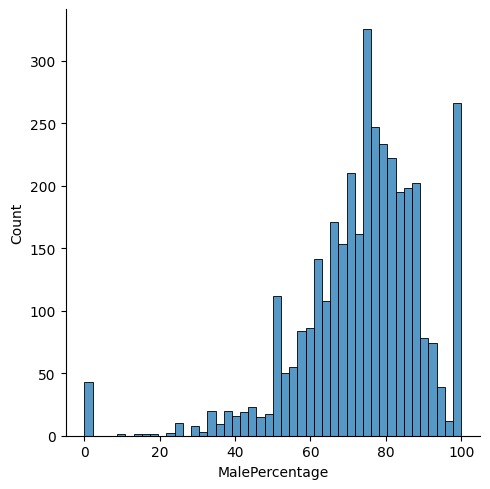

In [158]:
sns.displot(data=top1MalePreferredProducts.MalePercentage)

The breakup in percentages per product for male-females largely is in line with the overall count of 75%-25% across all products

In [159]:
top1MalePreferredProducts.query('MalePercentage>90').Product_ID.count()

429

In [160]:
top1MalePreferredProducts.query('MalePercentage>99').Product_ID.count()

264

There are 264 products bought exclusively by males


In [161]:
top1MalePreferredProducts.query('MalePercentage<1').Product_ID.count()

43

There are 43 products bought exclusively by females

analysis

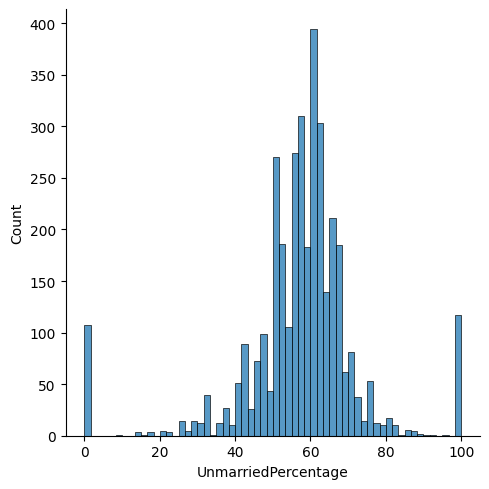

In [162]:
sns.displot(data=products.UnmarriedPercentage)

### 3.1.4 
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of Product and Marital Status

In [163]:
products.query('UnmarriedPercentage>99').Product_ID.count()

117

There are 117 products bought exclusively by Unmarried customers


In [164]:
products.query('UnmarriedPercentage<1').Product_ID.count()

107

There are 107 products bought exclusively by Married customers

### 3.1.5 
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of Product Category and Gender. Purchase

In [165]:
product_categories = products.groupby('Product_Category', as_index=False).agg(
    Revenue=('Revenue','sum'),
    Male_count=('Male_count', 'sum'),
    Female_count=('Female_count', 'sum'),
    Married_count=('Married_count', 'sum'),
    Unmarried_count=('Unmarried_count', 'sum')    
    )
product_categories.sort_values(by='Revenue', ascending=False, inplace=True)
product_categories


,Product_Category,Revenue,Male_count,Female_count,Married_count,Unmarried_count
0,1,1910013754,115547,24831,56003,84375
4,5,941835229,108972,41961,61277,89656
7,8,854318799,80367,33558,48514,65411
5,6,324150302,15907,4559,8327,12139
1,2,268516186,18206,5658,9726,14138
2,3,204084713,14207,6006,7854,12359
15,16,145120612,7426,2402,4115,5713
10,11,113791115,19548,4739,9619,14668
9,10,100837301,3963,1162,2347,2778
14,15,92969042,5244,1046,2667,3623


In [166]:
product_categories['MalePercentage'] = round(product_categories.Male_count*100/(product_categories.Male_count+product_categories.Female_count),0)
product_categories['UnmarriedPercentage'] = round(product_categories.Unmarried_count*100/(product_categories.Unmarried_count+product_categories.Married_count),0)
product_categories

,Product_Category,Revenue,Male_count,Female_count,Married_count,Unmarried_count,MalePercentage,UnmarriedPercentage
0,1,1910013754,115547,24831,56003,84375,82.0,60.0
4,5,941835229,108972,41961,61277,89656,72.0,59.0
7,8,854318799,80367,33558,48514,65411,71.0,57.0
5,6,324150302,15907,4559,8327,12139,78.0,59.0
1,2,268516186,18206,5658,9726,14138,76.0,59.0
2,3,204084713,14207,6006,7854,12359,70.0,61.0
15,16,145120612,7426,2402,4115,5713,76.0,58.0
10,11,113791115,19548,4739,9619,14668,80.0,60.0
9,10,100837301,3963,1162,2347,2778,77.0,54.0
14,15,92969042,5244,1046,2667,3623,83.0,58.0


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>Product Category 1 is the highest grossing category with USD 1.91 Billion in revenue
<li>For this category, 82% buyers are male.  However, as overall we have 75% male customers for Walmart, it would be prudent to check if the 82% is statistically significantly different from the average.
<li>This category contains ALL the Top 1% revenue-grossing products for Walmart
<li>Categories 5,8,6,2,3,16,11,10 are the other 1 Billion plus categories
<li>Category 19 is the lowest grossing category with just $59378 revenue

### 3.1.6
<span style="font-size:30px; font-family:Arial;color:orange">Univariate analysis of Gender column</span>


Text(0.5, 1.0, 'Gender breakup in overall users')

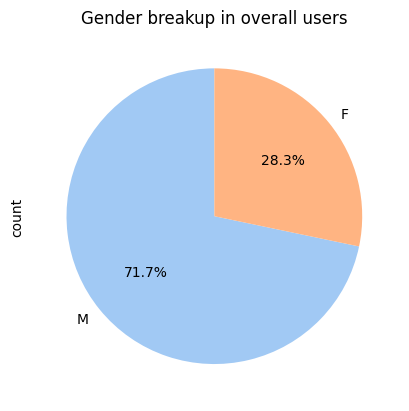

In [167]:
users['Gender'].value_counts().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'))
plt.title("Gender breakup in overall users")

In [168]:
users['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

### 3.1.7
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of Gender and Purchase column</span>


Text(0.5, 1.0, 'Gender breakup in overall purchases')

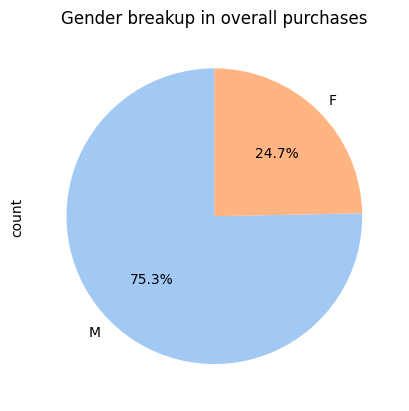

In [169]:
df['Gender'].value_counts().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'))
plt.title("Gender breakup in overall purchases")

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>There are 5891 unique users
<li>Out of these 4225(72%) are males, 1666 (28%) are females
<li>In terms of purchases too, 75% of purchases are by males and 25% are by females


In [170]:
males= df[df.Gender=='M']
females = df[df.Gender=='F']

PopMeanFemales = females.Purchase.mean()
PopMeanMales = males.Purchase.mean()
print(f'Population Mean purchase amount for females is ${PopMeanFemales:.2f}')
print(f'Population Mean purchase amount for males is ${PopMeanMales:.2f}')

Population Mean purchase amount for females is $8734.57
Population Mean purchase amount for males is $9437.53


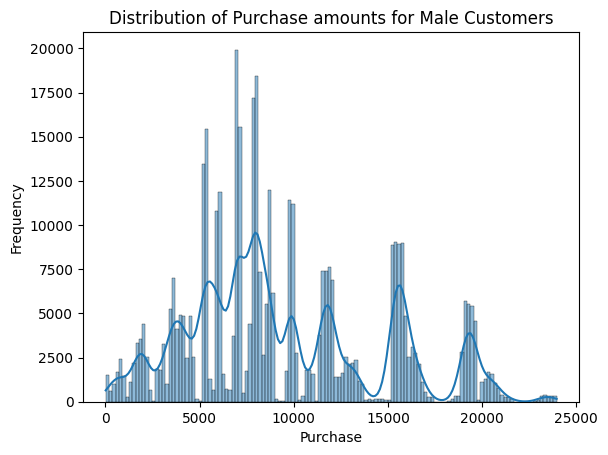

In [171]:
# plot the sample_means_male to see the distribution
sns.histplot(males.Purchase, kde=True)
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase amounts for Male Customers')
plt.show()

<li>The distribution of purchase amounts for males is not really normal.  However we can use CLT to estimate the mean value with some confidence.
<li>Instead of giving exact average, it is better to give an interval for the mean purchase amount.  
<li>We can do this by using the Central limit theorem
<li>We will select a sample, and use the sample mean to calculate an interval

### 3.1.8
<span style="font-size:30px; font-family:Arial;color:orange">Univariate analysis of Age column</span>


In [172]:
age = users.groupby(['Age','Gender'],as_index=False).size().sort_values(by="Age")
age

,Age,Gender,size
0,0-17,F,78
1,0-17,M,140
2,18-25,F,287
3,18-25,M,782
4,26-35,F,545
5,26-35,M,1508
6,36-45,F,333
7,36-45,M,834
8,46-50,F,182
9,46-50,M,349


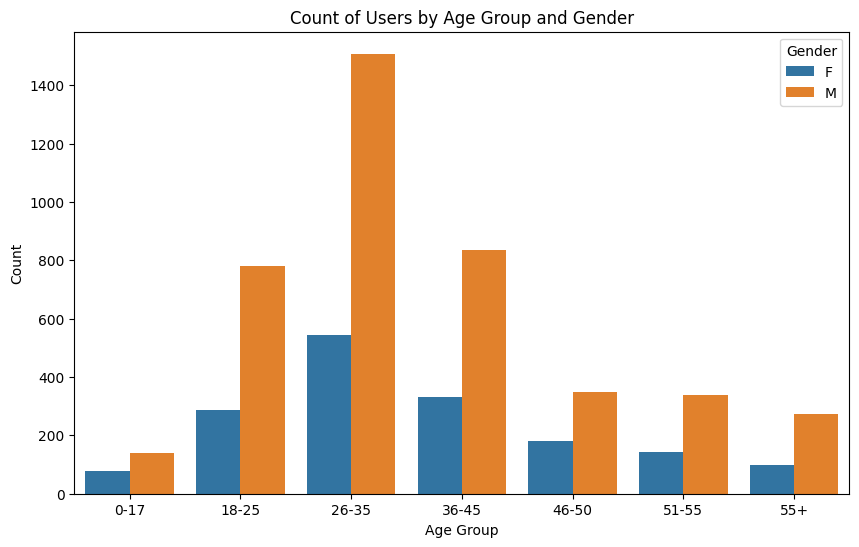

In [173]:
# Univariate Analysis

plt.figure(figsize=(10, 6))
sns.barplot(data=age, x='Age', y='size', hue='Gender')
plt.title('Count of Users by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### 3.1.9
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate analysis of Age and Gender column</span>


In [174]:
#select all records where gender is M

male_users = age[age['Gender'] == 'M']
male_users

# Insights from the age distribution plot
total_users = age['size'].sum()
male_users_count = male_users['size'].sum()
female_users_count = total_users - male_users_count

print(f"Total Users: {total_users}")
print(f"Male Users: {male_users_count} ({(male_users_count / total_users) * 100:.2f}%)")
print(f"Female Users: {female_users_count} ({(female_users_count / total_users) * 100:.2f}%)")

# Age group distribution
age_groups = age.groupby('Age')['size'].sum().reset_index()
age_groups['percentage'] = (age_groups['size'] / total_users) * 100
print("\nAge Group Distribution:")
print(age_groups)

# Gender distribution within each age group
age_gender_distribution = age.pivot(index='Age', columns='Gender', values='size').fillna(0)
age_gender_distribution['Total'] = age_gender_distribution.sum(axis=1)
age_gender_distribution['Male_Percentage'] = (age_gender_distribution['M'] / age_gender_distribution['Total']) * 100
age_gender_distribution['Female_Percentage'] = (age_gender_distribution['F'] / age_gender_distribution['Total']) * 100
print("\nAge and Gender Distribution:")
print(age_gender_distribution)

Total Users: 5891
Male Users: 4225 (71.72%)
Female Users: 1666 (28.28%)

Age Group Distribution:
     Age  size  percentage
0   0-17   218    3.700560
1  18-25  1069   18.146325
2  26-35  2053   34.849771
3  36-45  1167   19.809879
4  46-50   531    9.013750
5  51-55   481    8.164997
6    55+   372    6.314717

Age and Gender Distribution:
Gender    F     M  Total  Male_Percentage  Female_Percentage
Age                                                         
0-17     78   140    218        64.220183          35.779817
18-25   287   782   1069        73.152479          26.847521
26-35   545  1508   2053        73.453483          26.546517
36-45   333   834   1167        71.465296          28.534704
46-50   182   349    531        65.725047          34.274953
51-55   142   339    481        70.478170          29.521830
55+      99   273    372        73.387097          26.612903


<li>The highest number of users are in 26-35 age category and comprise 34% of overall users
<li>19% users are in 36-45 age group and 18% of users belong to 18-25 age group
<li>In the 0-17 age group, while only 3.7% of users lie, 35% of them are females, which is highest female ratio in any age group.

### 3.1.10
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Occupation and Gender</span>







In [175]:
occ = users.groupby(['Occupation','Gender'],as_index=False).size().sort_values(by="Occupation")
occ

,Occupation,Gender,size
0,0,F,226
1,0,M,462
2,1,F,203
3,1,M,314
4,2,F,88
5,2,M,168
6,3,F,98
7,3,M,72
8,4,F,228
9,4,M,512


### 3.1.11
<span style="font-size:30px; font-family:Arial;color:orange">Univariate Analysis of Occupation</span>

In [176]:
# Insights from the occupation distribution plot
occ_groups = occ.groupby('Occupation')['size'].sum().reset_index()
occ_groups['percentage'] = (occ_groups['size'] / total_users) * 100
print("Occupation Distribution:")
print(occ_groups)

Occupation Distribution:
    Occupation  size  percentage
0            0   688   11.678832
1            1   517    8.776099
2            2   256    4.345612
3            3   170    2.885758
4            4   740   12.561535
5            5   111    1.884230
6            6   228    3.870311
7            7   669   11.356306
8            8    17    0.288576
9            9    88    1.493804
10          10   192    3.259209
11          11   128    2.172806
12          12   376    6.382618
13          13   140    2.376507
14          14   294    4.990664
15          15   140    2.376507
16          16   235    3.989136
17          17   491    8.334748
18          18    67    1.137328
19          19    71    1.205228
20          20   273    4.634188


Occupations 0,4 and 7 have the maximum number of users, each have 11-12% users

In [177]:
# Gender distribution within each Occupation
occ_gender_distribution = occ.pivot(index='Occupation', columns='Gender', values='size').fillna(0)
occ_gender_distribution['Total'] = occ_gender_distribution.sum(axis=1)
occ_gender_distribution['Male_Percentage'] = (occ_gender_distribution['M'] / occ_gender_distribution['Total']) * 100
occ_gender_distribution['Female_Percentage'] = (occ_gender_distribution['F'] / occ_gender_distribution['Total']) * 100
print("\Occupation and Gender Distribution:")
print(occ_gender_distribution)

\Occupation and Gender Distribution:
Gender        F    M  Total  Male_Percentage  Female_Percentage
Occupation                                                     
0           226  462    688        67.151163          32.848837
1           203  314    517        60.735010          39.264990
2            88  168    256        65.625000          34.375000
3            98   72    170        42.352941          57.647059
4           228  512    740        69.189189          30.810811
5            31   80    111        72.072072          27.927928
6            99  129    228        56.578947          43.421053
7           137  532    669        79.521674          20.478326
8             3   14     17        82.352941          17.647059
9            85    3     88         3.409091          96.590909
10           66  126    192        65.625000          34.375000
11           22  106    128        82.812500          17.187500
12           46  330    376        87.765957          12.234043
13 

<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Admin\AppData\Local\Temp\ipykernel_37668\2747592413.py:6: SyntaxWarning: invalid escape sequence '\O'
  print("\Occupation and Gender Distribution:")


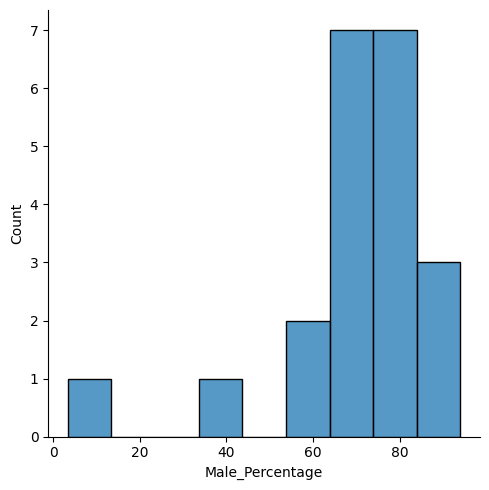

In [178]:
sns.displot(data=occ_gender_distribution['Male_Percentage'] )

The gender wise breakup for occupation is similar to overall gender breakup. One Way ANOVA on Occupation and Male Percentage column can be used to confirm this further
Occupation 9 is a occupation where 96.5% of users are males
Occupation 18 is a occupation where 94% of users are females


### 3.1.12
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Occupation and Age Group</span>

In [179]:
occAge = pd.crosstab(users.Age, users.Occupation)
occAge

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,26,4,3,0,3,0,0,2,1,0,...,1,1,1,2,0,0,2,0,11,0
18-25,101,44,42,18,518,18,9,17,1,6,...,7,58,0,37,12,17,50,10,30,46
26-35,292,152,109,67,197,52,75,251,6,28,...,50,177,0,129,71,56,197,22,15,106
36-45,131,115,46,41,14,24,57,213,3,34,...,31,83,5,67,25,56,129,16,9,67
46-50,62,80,29,16,3,10,29,71,1,9,...,17,32,7,25,17,37,56,8,2,20
51-55,43,68,17,16,5,6,38,76,2,7,...,16,19,27,19,8,45,35,9,2,23
55+,33,54,10,12,0,1,20,39,3,4,...,6,6,100,15,7,24,22,2,2,11


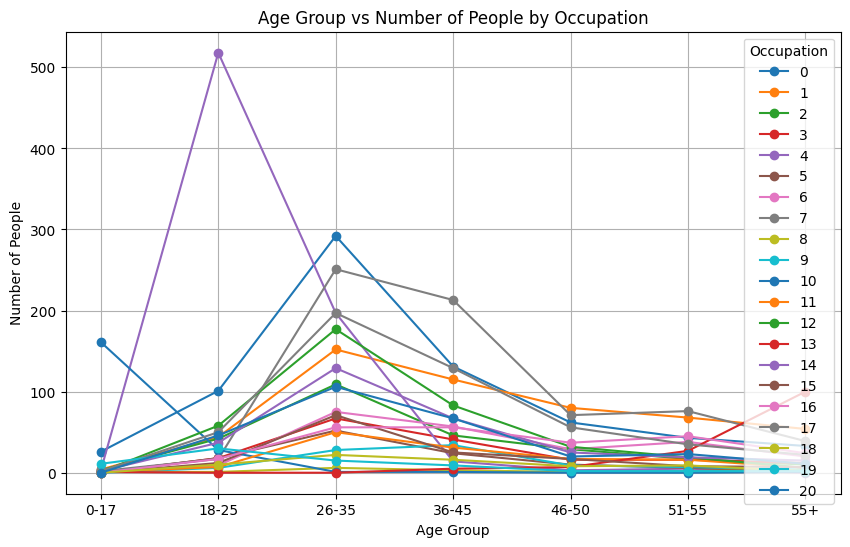

In [180]:
# Plot the line chart
plt.figure(figsize=(10, 6))

for column in occAge.columns:
    plt.plot(occAge.index, occAge[column], marker='o', label=column)

# Customize the plot
plt.title('Age Group vs Number of People by Occupation')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Occupation')
plt.grid(True)
plt.show()

In [181]:
#find which occupation has maximum value for 26-35 age group
# Total number of users in the 26-35 age group

def age_group_top3_occupations(age_group):
    total_users_in_age_group = cTrans[age_group].sum()

    top_3 = cTrans.nlargest(3, age_group)[age_group]
    print(f'{age_group} occupations {top_3.index.values}')
    print(f'Total users in {age_group} = {(top_3/total_users_26_35).sum()*100}')


age_group_top3_occupations('18-25')
age_group_top3_occupations('26-35')
age_group_top3_occupations('36-45')


18-25 occupations [ 4  0 12]


NameError: name 'total_users_26_35' is not defined

<li>For 26-35 age group, 36% of users are from occupations 0,4,7
<li>For 18-25 age group, 32% of users are from occupations 0,4,12
<li>For 36-45 age group, 23% of users are from occupations 0,7,17

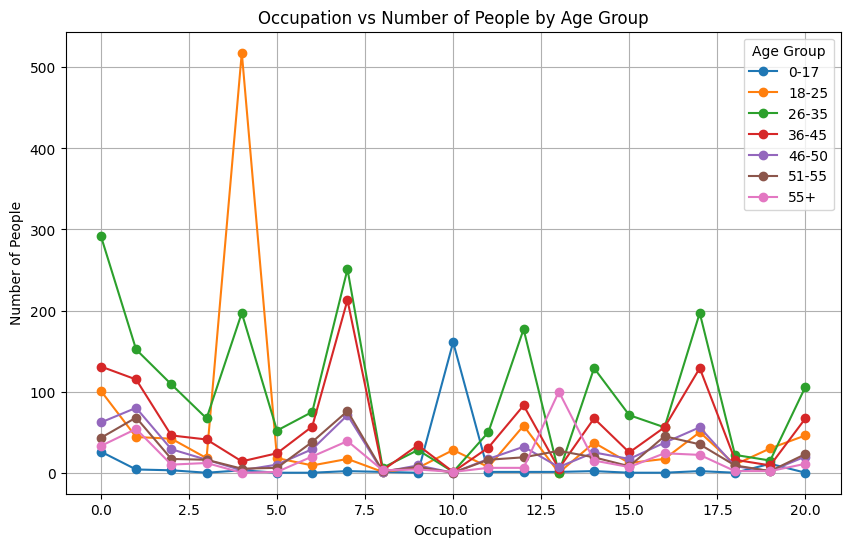

In [ ]:
# Plot the line chart
plt.figure(figsize=(10, 6))
cTrans = occAge.T
for column in cTrans.columns:
    plt.plot(cTrans.index, cTrans[column], marker='o', label=column)

# Customize the plot
plt.title('Occupation vs Number of People by Age Group')
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

### 3.1.13
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of City_Category and Purchase</span>


In [ ]:
city = df.groupby('City_Category',as_index=False).size().sort_values(by="City_Category")
city['percent'] = round(city['size']*100/len(df),0)
city

,City_Category,size,percent
0,A,147720,27.0
1,B,231173,42.0
2,C,171175,31.0


42% of purchases are from City B, 31% from city C


### 3.1.14
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of City_Category and User_ID</span>


In [ ]:
cityUser = users.groupby('City_Category',as_index=False).size().sort_values(by="City_Category")
cityUser['percent'] = round(cityUser['size']*100/len(users),0)
cityUser

,City_Category,size,percent
0,A,1045,18.0
1,B,1707,29.0
2,C,3139,53.0


53% of users are from City C, 29% from City B

### 3.1.15
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of City_Category and Gender</span>


In [ ]:
cityGender = pd.crosstab(users.City_Category, users.Gender, margins=True)
cityGender['percent'] = cityGender.M*100/cityGender.All
cityGender

Gender,F,M,All,percent
City_Category,,,,
A,295,750,1045,71.770335
B,503,1204,1707,70.533099
C,868,2271,3139,72.347881
All,1666,4225,5891,71.719572


The gender distribution across the three cities is same.

### 3.1.16
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of City_Category and Age Group</span>


In [ ]:
cityAge= pd.crosstab(users.City_Category, users.Age,margins=True)

#cityAge['percent'] = cityAge.M*100/cityGender.All
cityAge

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
City_Category,,,,,,,,
A,25,214,461,176,53,67,49,1045
B,50,331,652,335,146,135,58,1707
C,143,524,940,656,332,279,265,3139
All,218,1069,2053,1167,531,481,372,5891


In [ ]:
cityAge= pd.crosstab(users.City_Category, users.Age,normalize = 'index')
cityAge*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,2.392344,20.478469,44.114833,16.842105,5.071770,6.411483,4.688995
B,2.929115,19.390744,38.195665,19.625073,8.553017,7.908612,3.397774
C,4.555591,16.693214,29.945843,20.898375,10.576617,8.888181,8.442179


In [ ]:
cityAge= pd.crosstab(users.City_Category, users.Age,normalize = 'columns',margins= True)
round(cityAge*100,0)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
City_Category,,,,,,,,
A,11.0,20.0,22.0,15.0,10.0,14.0,13.0,18.0
B,23.0,31.0,32.0,29.0,27.0,28.0,16.0,29.0
C,66.0,49.0,46.0,56.0,63.0,58.0,71.0,53.0


<li>In City A, 44% of users are from 26-35 age group
<li>While 53% of users are from City C, it has 71% of all 55+ aged users  

### 3.1.17
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of City_Category and Occupation</span>


In [ ]:
cityOcc= pd.crosstab(users.City_Category, users.Occupation,margins=True)

#cityAge['percent'] = cityAge.M*100/cityGender.All
cityOcc

Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
City_Category,,,,,,,,,,,,,,,,,,,,,
A,129,94,68,34,172,14,24,113,4,7,...,77,12,53,25,35,62,7,14,59,1045
B,203,140,80,47,236,40,74,170,2,25,...,113,30,83,43,61,136,12,18,106,1707
C,356,283,108,89,332,57,130,386,11,56,...,186,98,158,72,139,293,48,39,108,3139
All,688,517,256,170,740,111,228,669,17,88,...,376,140,294,140,235,491,67,71,273,5891


In [ ]:
cityOcc= pd.crosstab(users.City_Category, users.Occupation,normalize = 'index')

round(cityOcc*100,0)


Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,,
A,12.0,9.0,7.0,3.0,16.0,1.0,2.0,11.0,0.0,1.0,...,2.0,7.0,1.0,5.0,2.0,3.0,6.0,1.0,1.0,6.0
B,12.0,8.0,5.0,3.0,14.0,2.0,4.0,10.0,0.0,1.0,...,3.0,7.0,2.0,5.0,3.0,4.0,8.0,1.0,1.0,6.0
C,11.0,9.0,3.0,3.0,11.0,2.0,4.0,12.0,0.0,2.0,...,2.0,6.0,3.0,5.0,2.0,4.0,9.0,2.0,1.0,3.0


In [ ]:
cityOcc.loc['A'].sum()

0.9999999999999999

In [ ]:
cityOccTrans= cityOcc.T
def city_group_top3_occupations(city_group):
    top_3 = cityOccTrans.nlargest(3, city_group)[city_group]
    print(f'{city_group} occupations {top_3.index.values}')
    print(f'% users in top 3 occupations for {city_group} = {(top_3).sum()*100}')


city_group_top3_occupations('A')
city_group_top3_occupations('B')
city_group_top3_occupations('C')


A occupations [4 0 7]
% users in top 3 occupations for A = 39.61722488038278
B occupations [4 0 7]
% users in top 3 occupations for B = 35.67662565905097
C occupations [7 0 4]
% users in top 3 occupations for C = 34.21471806307741


### 3.1.18
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of City_Category and Product Category</span>


In [ ]:
cityProdCat= pd.crosstab(df.City_Category, df.Product_Category,margins=True)
cityProdCat

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
City_Category,,,,,,,,,,,,,,,,,,,,,
A,35081,6141,4943,3050,42211,5507,1226,32179,110,1333,...,1063,1614,481,1717,2848,121,753,273,468,147720
B,58253,10444,8587,5226,64138,8526,1599,47553,174,2063,...,1675,2271,632,2638,4038,267,1389,462,753,231173
C,47044,7279,6683,3477,44584,6433,896,34193,126,1729,...,1209,1664,410,1935,2942,190,983,868,1329,171175
All,140378,23864,20213,11753,150933,20466,3721,113925,410,5125,...,3947,5549,1523,6290,9828,578,3125,1603,2550,550068


### 3.1.19
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Stay_In_Current_City_Years and UserID</span>

In [ ]:
stayDuration= users.groupby('Stay_In_Current_City_Years',as_index=False).size().sort_values('Stay_In_Current_City_Years')
stayDuration['percent'] = round(stayDuration['size']*100/stayDuration['size'].sum(),0)
stayDuration


,Stay_In_Current_City_Years,size,percent
0,0,772,13.0
1,1,2086,35.0
2,2,1145,19.0
3,3,979,17.0
4,4+,909,15.0


35% of users have stayed in same city for 1-2 yrs

### 3.1.20
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Stay_In_Current_City_Years and Stay Duration</span>

In [ ]:
cityStayDuration = pd.crosstab(users.City_Category,users.Stay_In_Current_City_Years, normalize='index')
cityStayDuration

Stay_In_Current_City_Years,0,1,2,3,4+
City_Category,,,,,
A,0.140670,0.354067,0.175120,0.172249,0.157895
B,0.123609,0.356180,0.200351,0.172818,0.147042
C,0.131889,0.352979,0.197515,0.160561,0.157056


The duration of stay in the city is similar in all three cities across various duration categories.

In [ ]:
genderStayDuration = pd.crosstab(users.Gender,users.Stay_In_Current_City_Years, normalize='index')
genderStayDuration

Stay_In_Current_City_Years,0,1,2,3,4+
Gender,,,,,
F,0.128451,0.362545,0.196879,0.171669,0.140456
M,0.132071,0.350769,0.193373,0.164024,0.159763


### 3.1.21
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Marital_Status and Gender</span>

In [ ]:
maritalStatusGender= pd.crosstab(users.Marital_Status, users.Gender,margins=True)
maritalStatusGender

Gender,F,M,All
Marital_Status,,,
0,947,2470,3417
1,719,1755,2474
All,1666,4225,5891


In [ ]:
print('Unmarried % = ',round(100*maritalStatusGender.at[0,'All'] /maritalStatusGender.at['All','All'],1))
print('Unmarried male% = ',round(100*maritalStatusGender.at[0,'M'] /maritalStatusGender.at['All','M'],1))
print('Unmarried female% = ',round(100*maritalStatusGender.at[0,'F'] /maritalStatusGender.at['All','F'],1))

Unmarried % =  58.0
Unmarried male% =  58.5
Unmarried female% =  56.8


58% of users are unmarried
Ratio of unmarried users is same across genders

### 3.1.22
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Marital_Status and Age Category</span>

In [ ]:
maritalStatusAge= pd.crosstab(users.Marital_Status, users.Age,margins=True)
maritalStatusAge

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Marital_Status,,,,,,,,
0,218,825,1244,705,156,136,133,3417
1,0,244,809,462,375,345,239,2474
All,218,1069,2053,1167,531,481,372,5891


In [ ]:
# Calculate percentages
maritalStatusAge_percent = maritalStatusAge.div(maritalStatusAge['All'], axis=0) * 100
maritalStatusAge_percent



Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Marital_Status,,,,,,,,
0,6.379865,24.143986,36.406204,20.632133,4.565408,3.980100,3.892303,100.0
1,0.000000,9.862571,32.700081,18.674212,15.157639,13.945028,9.660469,100.0
All,3.700560,18.146325,34.849771,19.809879,9.013750,8.164997,6.314717,100.0


In [ ]:
print(24/(9+24))
print(36.4/(36.4+32))
print(20.6/(20.6+18.6))

0.7272727272727273
0.5321637426900584
0.5255102040816326


<li>72% of users in 18-25 age group are unmarried
<li>53% of users in 26-35 age group are unmarried
<li>52% of users in 36-45 age group are unmarried



### 3.1.23
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Marital_Status and Occupation</span>

In [ ]:
maritalStatusOcc= pd.crosstab(users.Marital_Status, users.Occupation,margins=True)
maritalStatusOcc

Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,402,279,144,90,544,65,102,355,11,41,...,219,50,151,73,110,288,35,57,144,3417
1,286,238,112,80,196,46,126,314,6,47,...,157,90,143,67,125,203,32,14,129,2474
All,688,517,256,170,740,111,228,669,17,88,...,376,140,294,140,235,491,67,71,273,5891


In [ ]:
#Calculate the breakup of the married unmarried group acorss occupations
maritalStatusOcc_percent = maritalStatusOcc.div(maritalStatusOcc['All'], axis=0) * 100
maritalStatusOcc_percent

Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,11.764706,8.165057,4.214223,2.633889,15.920398,1.902253,2.985075,10.389230,0.321920,1.199883,...,6.409131,1.463272,4.419081,2.136377,3.219198,8.428446,1.024290,1.668130,4.214223,100.0
1,11.560226,9.620049,4.527082,3.233630,7.922393,1.859337,5.092967,12.691997,0.242522,1.899757,...,6.345998,3.637833,5.780113,2.708165,5.052546,8.205335,1.293452,0.565885,5.214228,100.0
All,11.678832,8.776099,4.345612,2.885758,12.561535,1.884230,3.870311,11.356306,0.288576,1.493804,...,6.382618,2.376507,4.990664,2.376507,3.989136,8.334748,1.137328,1.205228,4.634188,100.0


In [ ]:
#Calculate the breakup of the married unmarried group within each occupation
sum_first_two   = maritalStatusOcc_percent.iloc[0:2].sum()
# Calculate the percentages for each column
percentage_row = round((maritalStatusOcc_percent.iloc[0:1] / sum_first_two) * 100,1)

# Add the percentage row to the DataFrame
maritalStatusOcc_percent = pd.concat([maritalStatusOcc_percent,percentage_row])
maritalStatusOcc_percent

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 'All'],
      dtype='object', name='Occupation')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 'All'],
      dtype='object', name='Occupation')


Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,11.764706,8.165057,4.214223,2.633889,15.920398,1.902253,2.985075,10.389230,0.321920,1.199883,...,6.409131,1.463272,4.419081,2.136377,3.219198,8.428446,1.024290,1.668130,4.214223,100.0
1,11.560226,9.620049,4.527082,3.233630,7.922393,1.859337,5.092967,12.691997,0.242522,1.899757,...,6.345998,3.637833,5.780113,2.708165,5.052546,8.205335,1.293452,0.565885,5.214228,100.0
All,11.678832,8.776099,4.345612,2.885758,12.561535,1.884230,3.870311,11.356306,0.288576,1.493804,...,6.382618,2.376507,4.990664,2.376507,3.989136,8.334748,1.137328,1.205228,4.634188,100.0
0,50.400000,45.900000,48.200000,44.900000,66.800000,50.600000,37.000000,45.000000,57.000000,38.700000,...,50.200000,28.700000,43.300000,44.100000,38.900000,50.700000,44.200000,74.700000,44.700000,50.0


<li>66% of users in Occupation 4 are unmarried
<li>50% of users in Occupation 0 are unmarried
<li>45% of users in Occupation 7 are unmarried
<li>75% of users in Occupation 19 are unmarried


### 3.1.24
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Marital_Status and City</span>

In [ ]:
maritalStatusCity= pd.crosstab(users.Marital_Status, users.City_Category,margins=True)
maritalStatusCity

City_Category,A,B,C,All
Marital_Status,,,,
0,652,1004,1761,3417
1,393,703,1378,2474
All,1045,1707,3139,5891


In [ ]:
#Calculate the breakup of the married unmarried group across each city
maritalStatusCity_percent = maritalStatusCity.div(maritalStatusCity['All'], axis=0) * 100
maritalStatusCity_percent

City_Category,A,B,C,All
Marital_Status,,,,
0,19.081065,29.382499,51.536435,100.0
1,15.885206,28.415521,55.699272,100.0
All,17.738924,28.976405,53.284672,100.0


<li> The breakup of married-unmarried users is same as the general breakup of users across the cities


In [ ]:
#Calculate the breakup of the married unmarried group within each city
sum_first_two   = maritalStatusCity_percent.iloc[0:2].sum()
# Calculate the percentages for each column
percentage_row = round((maritalStatusCity_percent.iloc[0:1] / sum_first_two) * 100,1)

# Add the percentage row to the DataFrame
maritalStatusCity_percent = pd.concat([maritalStatusCity_percent,percentage_row])
maritalStatusCity_percent

City_Category,A,B,C,All
Marital_Status,,,,
0,19.081065,29.382499,51.536435,100.0
1,15.885206,28.415521,55.699272,100.0
All,17.738924,28.976405,53.284672,100.0
0,54.600000,50.800000,48.100000,50.0


<li>While overall we have 58% unmarried users, in City C we have only 48% of unmarried users

### 3.1.25
<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis of Marital_Status and Stay Duration</span>

In [ ]:
maritalStatusStayDuration= pd.crosstab(users.Marital_Status, users.Stay_In_Current_City_Years,margins=True)
maritalStatusStayDuration

#Calculate the breakup of the married unmarried group across each city
maritalStatusStayDuration_percent = maritalStatusStayDuration.div(maritalStatusStayDuration['All'], axis=0) * 100
maritalStatusStayDuration_percent




Stay_In_Current_City_Years,0,1,2,3,4+,All
Marital_Status,,,,,,
0,13.666959,34.182031,19.402985,16.944688,15.803336,100.0
1,12.328213,37.105901,19.482619,16.168149,14.915117,100.0
All,13.104736,35.409947,19.436428,16.618571,15.430317,100.0


<li> The breakup of married-unmarried users is same as the general breakup of duration of stay of users irrespective of marital status.  So marital status does not have any impact on duration of stay in a city for a user

### 3.1.26
<span style="font-size:30px; font-family:Arial;color:orange">Univariate Analysis of Purchase column</span>


In [ ]:
df.Purchase.mean()

9263.968712959126

<Axes: xlabel='Purchase', ylabel='Count'>

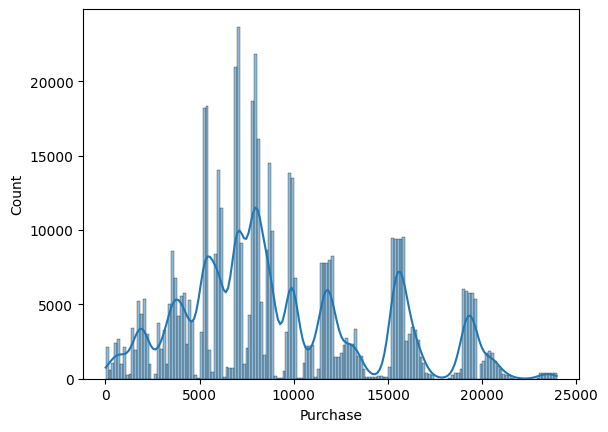

In [ ]:
sns.histplot(data=df["Purchase"], kde=True)

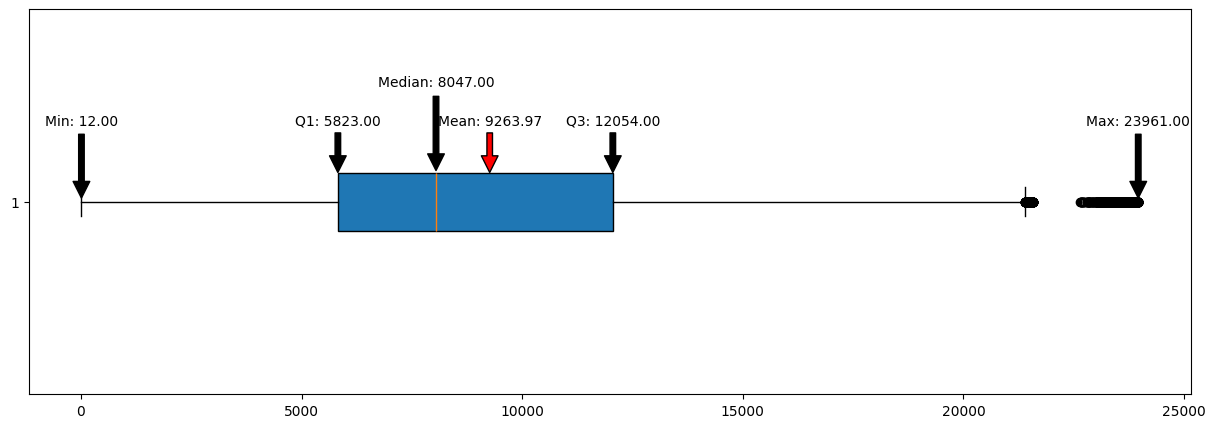

In [ ]:
data=df.Purchase #Only this one line is to be updated

fig, ax = plt.subplots(figsize=(15, 5))
# Create boxplot
boxplot = ax.boxplot(data, vert=False, patch_artist=True)

# Calculate the five-number summary + mean
mean = np.mean(data)
min_val = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
max_val = np.max(data)

# Annotate the five-number summary on the boxplot
ax.annotate(f'Min: {min_val:.2f}', xy=(min_val, 1), xytext=(min_val, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Q1: {q1:.2f}', xy=(q1, 1.07), xytext=(q1, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Median: {median:.2f}', xy=(median, 1.07), xytext=(median, 1.3),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Q3: {q3:.2f}', xy=(q3, 1.07), xytext=(q3, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Max: {max_val:.2f}', xy=(max_val, 1), xytext=(max_val, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Mean: {mean:.2f}', xy=(mean, 1.07), xytext=(mean, 1.2),
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center')


# Display plot
plt.show()



<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>50% of customers shop between $5823 and $12054
<li>Overall range of purchase amount is from $12 to $23961

# 4.0
Answering Questions asked in Case Study

## 4.1
<span style="font-size:30px; font-family:Arial;color:orange">Are women spending more money per transaction than men? Why or Why not</span>


We have already established that 
Mean purchase amount for males is $9437.53
Mean purchase amount for females is $8734.57

So women are not spending more money per transaction than men as per this data.
Later we have statistically established that the spending habits of the two groups is different


# Why are women spending less?
We observe that only 25% of customers are women as per given data.

## Possible reasons
- Walmart's marketing strategies might be more appealing to men, leading to higher male foot traffic and spending
- Cultural norms and societal expectations might influence shopping behaviors. For example, women might be more likely to shop for groceries and household items, while men might shop for higher-ticket items
- Gender Roles: Traditional gender roles might play a part in determining who does the shopping and what they buy.

## It could indicate that shopping experience of women needs improvement 
This can be done by 
- keeping more items relevant to women. The product mix at Walmart might cater more to male preferences, such as electronics and automotive products, which could result in higher spending by men
- making it easier to reach 
- helpful and women friendly staff
- ensuring women safety
- Women are more likely to use coupons and look for discounts, which might lead them to shop at stores that offer better deals

## 4.2
<span style="font-size:30px; font-family:Arial;color:orange">Confidence intervals and distribution of the mean of the expenses by female and male customers </span>


In [ ]:
# select a random sample of 1000 rows for each gender
sample_males = males.sample(n=1000)
sample_females = females.sample(n=1000)

# identify confidence interval for the mean of the purchase
from scipy import stats

def my_decorator(func):
    def wrapper(data, confidence=0.95, text="Mean"):
        mean, lower,upper = func(data, confidence)
        return  f'Using CLT and single sample of {len(data)} rows, {text} = {mean:.2f}, CI = [{lower:.2f}, {upper:.2f}] with {confidence*100}% confidence'
    return wrapper

#We want to decorate the function mean_confidence_interval to add some text to the output
@my_decorator
def mean_confidence_interval_decorated(data, confidence=0.95):
    return mean_confidence_interval(data, confidence)

#Function to calculate the confidence interval for the mean of the purchase amount
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1) #dof is n-1
    return m,m-h,m+h
    

      
print(f'Using actual population of {len(males)} rows, Population Mean purchase amount for males is ${PopMeanMales:.2f}')
print(f'{mean_confidence_interval_decorated(sample_males.Purchase, confidence=0.95, text="Mean Purchase amount for Males")}')
print()
print(f'Using actual population of {len(females)} rows,Population Mean purchase amount for females is ${PopMeanFemales:.2f}')
print(f'{mean_confidence_interval_decorated(sample_females.Purchase, confidence=0.95, text="Mean Purchase amount for Females")}')





Using actual population of 414259 rows, Population Mean purchase amount for males is $9437.53
Using CLT and single sample of 1000 rows, Mean Purchase amount for Males = 9191.12, CI = [8889.37, 9492.87] with 95.0% confidence

Using actual population of 135809 rows,Population Mean purchase amount for females is $8734.57
Using CLT and single sample of 1000 rows, Mean Purchase amount for Females = 8811.79, CI = [8514.98, 9108.60] with 95.0% confidence


In [ ]:
#Utility function to plot sample means distribution and confidence interval

import matplotlib.patches as mpatches

def plotConfidenceIntervals(sample_means,pop_mean,text,xlabel):
        #Plot the second and third colummns of sample_means which are the lower and upper bounds of the confidence interval

    totalIntervalCount = len(sample_means)
    plt.figure(figsize=(10, 5+round(totalIntervalCount/10,0)))
    missed=0
    
    #Plot 1000 confidence intervals to see how many contain the population mean
    for i in range(totalIntervalCount):
        # Plot the horizontal line for the confidence interval
        mean, lower,upper = sample_means[i]
        #Plot the confidence interval that miss the population mean in red
        if(lower<=pop_mean<=upper):
            plt.hlines(i*4, lower,upper, color='g', linewidth=2, label=f'95% CI for {mean:.2f}')
        else:
            missed=missed+1
            plt.hlines(i*4, lower,upper, color='r', linewidth=2, label=f'95% CI for {mean:.2f}')
        # Plot the sample mean as a dot
        plt.plot(mean, i*4, 'ro', label='Mean')

    # Plot the population mean
    plt.axvline(pop_mean, color='b', linestyle='dashed', linewidth=2, label='Mean')

    # Add custom legend
    red_line = mpatches.Patch(color='red', label=f'{missed}({missed*100/totalIntervalCount}) Intervals that missed the population mean')
    green_line = mpatches.Patch(color='green', label=f'{totalIntervalCount-missed}({(totalIntervalCount-missed)*100/totalIntervalCount}) Intervals that include the population mean')
    blue_line = mpatches.Patch(color='blue', label=f'Population mean = {pop_mean:.2f}')
    red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Mean of the sample', markerfacecolor='red', markersize=10)

    plt.legend(handles=[red_line, green_line, red_dot,blue_line], loc='upper left')
    

    plt.title(f'Population Mean {pop_mean:.2f} and {totalIntervalCount} 95% Confidence Interval {text}')
    plt.xlabel(xlabel)
    plt.yticks([])  # Remove y-axis ticks
  

def plotSampleMeanDistributionAndConfidenceIntervals(data,
                            sample_size,
                            pop_mean,
                            confidence=0.95,
                            text="for"):

    sample_means=[]
    for _ in range(1000):
        sample  = data.sample(n=sample_size)
        m,l,u = mean_confidence_interval(sample, confidence)
        sample_means.append([m,l,u])
    #select first column of the sample_means_male, whcih is the mean
    sample_means = np.array(sample_means)
    # plot the sample_means_male to see the distribution
    sns.histplot(sample_means[:,0], kde=True)
    plt.xlabel(data.name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sample means of {data.name} amounts {text}')
    plt.show()

    plotConfidenceIntervals(sample_means,pop_mean,text,data.name)
    return sample_means




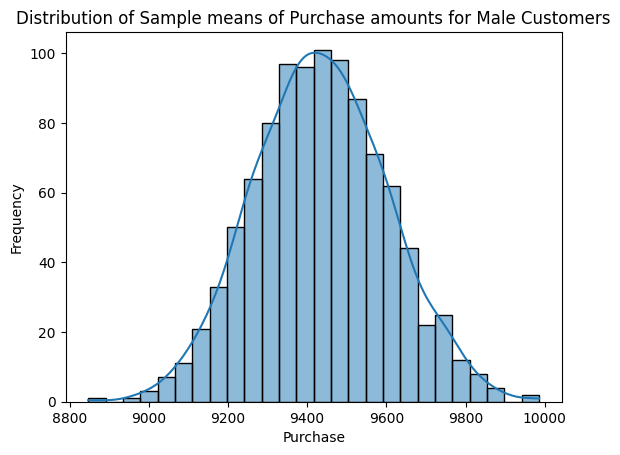

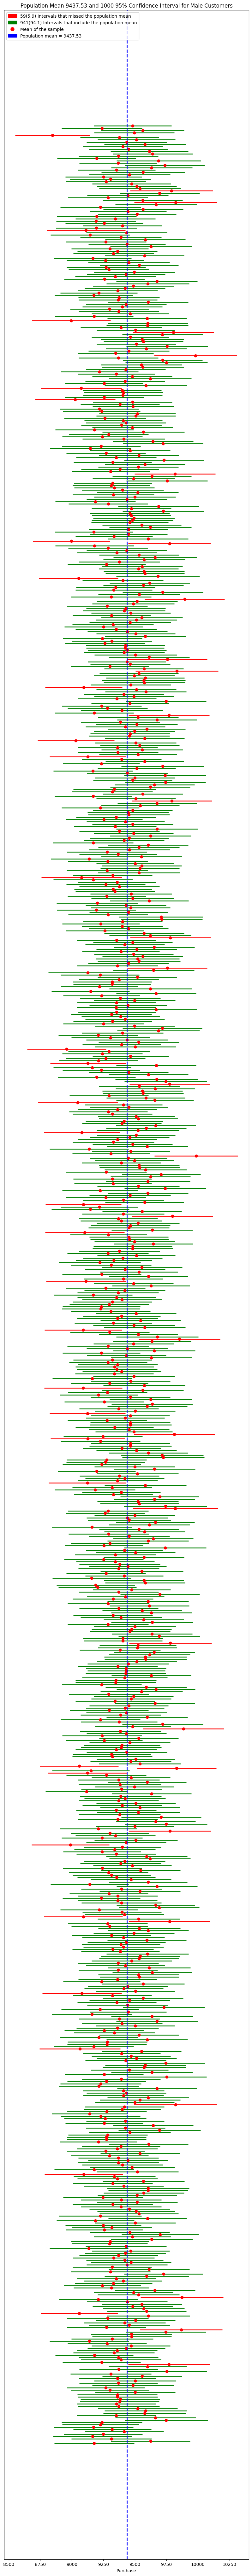

In [ ]:
male_sample_means = plotSampleMeanDistributionAndConfidenceIntervals(males.Purchase, 1000, PopMeanMales, confidence=0.95, text="for Male Customers")

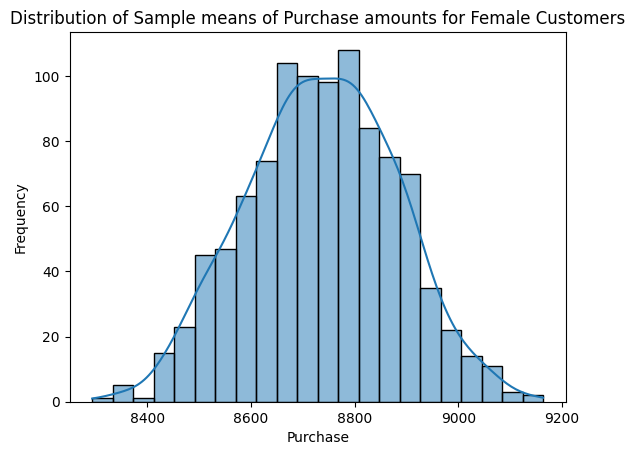

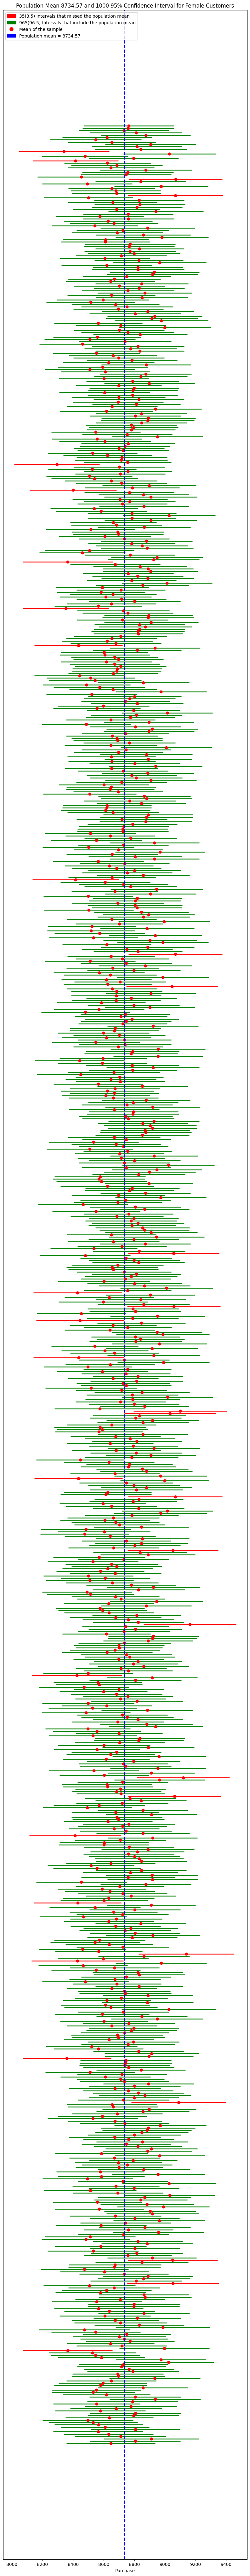

In [ ]:
female_sample_means = plotSampleMeanDistributionAndConfidenceIntervals(females.Purchase, 1000, PopMeanFemales, confidence=0.95, text="for Female Customers")


## 4.2.1
<span style="font-size:30px; font-family:Arial;color:orange">Effect of sample size on the confidence interval</span>


In [ ]:
#Lets explore effect of sample size on the confidence interval
sample_means=[]
sample_sizes=[10,50,100,500,1000]
for sample_size in sample_sizes:
    sample= males.Purchase.sample(n=sample_size)
    m,l,u = mean_confidence_interval(sample, 0.95)
    sample_means.append([m,l,u])
#select first column of the sample_means_male, whcih is the mean
sample_means = np.array(sample_means)

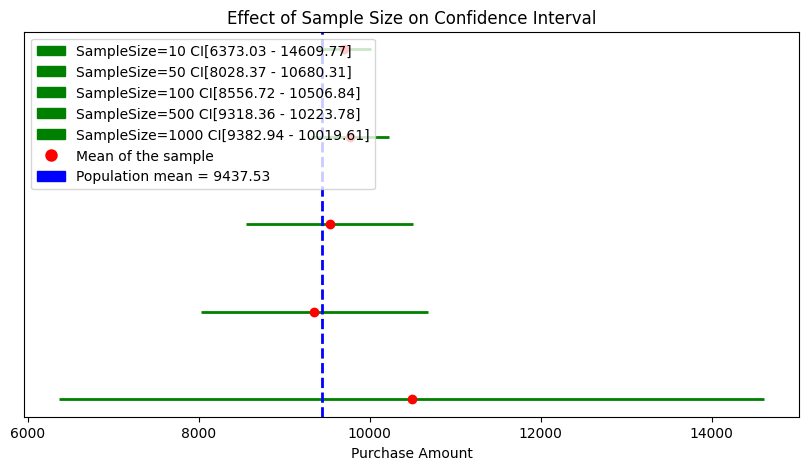

In [ ]:
pop_mean = PopMeanMales
plotConfidenceIntervals(sample_means,pop_mean,"Male","Purchase Amount")
# Add custom legend
legendEntry=[]
i=0
for sample_mean in sample_means:
    
    legendEntry.append(mpatches.Patch(color='green', label=f'SampleSize={sample_sizes[i]} CI[{sample_mean[1]:.2f} - {sample_mean[2]:.2f}]'))
    i=i+1
blue_line = mpatches.Patch(color='blue', label=f'Population mean = {pop_mean:.2f}')
red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Mean of the sample', markerfacecolor='red', markersize=10)
legendEntry.append(red_dot)
legendEntry.append(blue_line)
plt.title('Effect of Sample Size on Confidence Interval')
plt.legend(handles=legendEntry, loc='upper left')

<li>We can see that as the sample size decreases from 1000 to 10, the confidence interval increases

## 4.2.2
<span style="font-size:30px; font-family:Arial;color:orange">Effect of significance level on width of the confidence interval</span>


In [ ]:
#Lets explore effect of significance level on width of the confidence interval
sample_means=[]
significanceLevel=[0.99,0.95,0.9]
sample_size=1000
for significance in significanceLevel:
    sample= males.Purchase.sample(n=sample_size)
    m,l,u = mean_confidence_interval(sample, significance)
    sample_means.append([m,l,u])
#select first column of the sample_means_male, whcih is the mean
sample_means = np.array(sample_means)

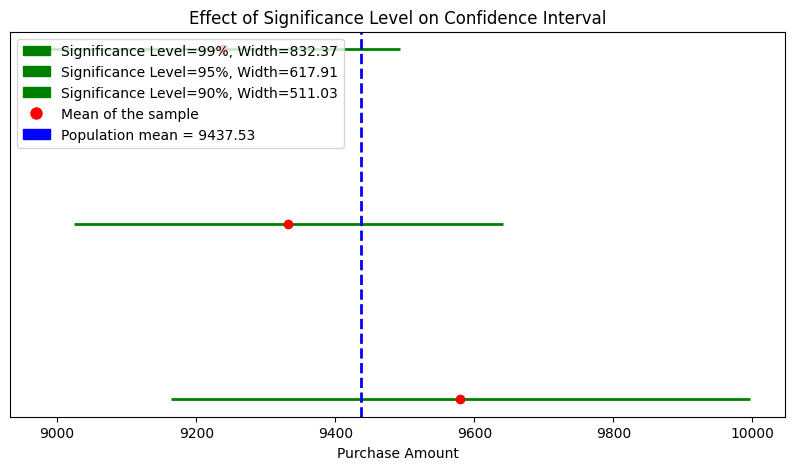

In [ ]:
pop_mean = PopMeanMales
plotConfidenceIntervals(sample_means,pop_mean,"Male","Purchase Amount")
# Add custom legend
legendEntry=[]
i=0
for sample_mean in sample_means:    
    legendEntry.append(mpatches.Patch(color='green', label=f'Significance Level={int(significanceLevel[i]*100)}%, Width={sample_mean[2]- sample_mean[1]:.2f}'))
    i=i+1
blue_line = mpatches.Patch(color='blue', label=f'Population mean = {pop_mean:.2f}')
red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Mean of the sample', markerfacecolor='red', markersize=10)
legendEntry.append(red_dot)
legendEntry.append(blue_line)
plt.title('Effect of Significance Level on Confidence Interval')
plt.legend(handles=legendEntry, loc='upper left')

<li>As significance level increases from 90% to 95% to 99%, the width of confidence interval required increases too, from 537.84 to 625.07 to 822.25

## 4.3
<span style="font-size:30px; font-family:Arial;color:orange">Are confidence intervals of average male and female spending overlapping?</span>


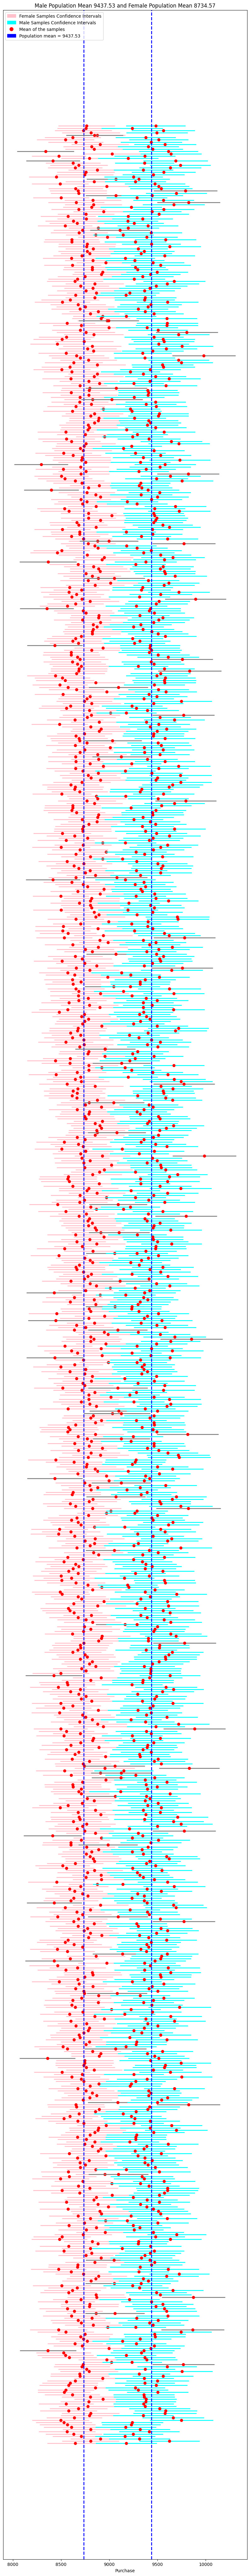

In [ ]:
#Plot the confidence intevals for male and female on same graph
sample_means =female_sample_means
pop_mean = PopMeanFemales
totalIntervalCount = len(sample_means)
color='pink'

plt.figure(figsize=(10, 5+round(totalIntervalCount/10,0)))
missed=0

#Plot 1000 confidence intervals to see how many contain the population mean
for i in range(totalIntervalCount):
    # Plot the horizontal line for the confidence interval
    mean, lower,upper = sample_means[i]
    #Plot the confidence interval that miss the population mean in red
    if(lower<=pop_mean<=upper):
        plt.hlines(i*4, lower,upper, color=color, linewidth=2, label=f'95% CI for {mean:.2f}')
    else:
        missed=missed+1
        plt.hlines(i*4, lower,upper, color='gray', linewidth=2, label=f'95% CI for {mean:.2f}')
    # Plot the sample mean as a dot
    plt.plot(mean, i*4, 'ro', label='Mean')

# Plot the population mean
plt.axvline(pop_mean, color='b', linestyle='dashed', linewidth=2, label='Mean')
################################
sample_means =male_sample_means
pop_mean = PopMeanMales
totalIntervalCount = len(sample_means)
color='cyan'

missed=0

#Plot 1000 confidence intervals to see how many contain the population mean
for i in range(totalIntervalCount):
    # Plot the horizontal line for the confidence interval
    mean, lower,upper = sample_means[i]
    #Plot the confidence interval that miss the population mean in red
    if(lower<=pop_mean<=upper):
        plt.hlines(i*4, lower,upper, color=color, linewidth=2, label=f'95% CI for {mean:.2f}')
    else:
        missed=missed+1
        plt.hlines(i*4, lower,upper, color='gray', linewidth=2, label=f'95% CI for {mean:.2f}')
    # Plot the sample mean as a dot
    plt.plot(mean, i*4, 'ro', label='Mean')

# Plot the population mean
plt.axvline(pop_mean, color='b', linestyle='dashed', linewidth=2, label='Mean')


# # Add custom legend
pink_line = mpatches.Patch(color='pink', label=f'Female Samples Confidence Intervals')
cyan_line = mpatches.Patch(color='cyan', label=f'Male Samples Confidence Intervals')
blue_line = mpatches.Patch(color='blue', label=f'Population mean = {pop_mean:.2f}')
red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Mean of the samples', markerfacecolor='red', markersize=10)

plt.legend(handles=[pink_line, cyan_line, red_dot,blue_line], loc='upper left')


plt.title(f'Male Population Mean {PopMeanMales:.2f} and Female Population Mean {PopMeanFemales:.2f}' )
plt.xlabel("Purchase")
plt.yticks([])  # Remove y-axis ticks
plt.show()

*** Overlap or not in Confidence Intervals ***

The confidence intervals for average male and female spending are not spread apart, but do not seem to overlap as well, when seen visually.
They seem to be on the brink of overlap, when seen visually.

We may perform some more statistical test to confirm whether they are close enough or can be considered non overlapping



In [ ]:
# Perform a two-sample t-test to compare the mean purchase amount for females with the male population 
# to see if there is a significant difference between the two groups
t_stat, p_value = stats.ttest_ind(males.Purchase.sample(100000), PopMeanFemales)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)



T-statistic: 0.14020223602184118
P-value: 0.8885004876400978
Fail to reject the null hypothesis: There is no significant difference between male and female spending.


In [ ]:
# Perform a two-sample t-test to compare the mean purchase amount for males with the female population 
# to see if there is a significant difference between the two groups
t_stat, p_value = stats.ttest_ind(females.Purchase.sample(100000), PopMeanMales)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between male and female spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between male and female spending.")

T-statistic: -0.14691910946531
P-value: 0.8831961646016145
Fail to reject the null hypothesis: There is no significant difference between male and female spending.


In [ ]:
from statsmodels.stats import weightstats as stests
from scipy import stats

x1 = females.Purchase.sample(10000)
x2 = males.Purchase.sample(10000)

#As we dont techincally have population data, we will use ttest.  
# z_score, p_value = stests.ztest(x1,x2, value = 0, alternative = 'two-sided')
# print(f'Two sample Ztest zscore:{z_score}   pvalue:{pval}')

# # Conclusion
# alpha = 0.05  # Significance level
# if p_value < alpha:
#     print("Reject the null hypothesis: There is a significant difference between male and female spending.")
# else:
#     print("Fail to reject the null hypothesis: There is no significant difference between male and female spending.")


from scipy.stats import ttest_ind
t_score,p_value=ttest_ind(x1,x2 ,alternative = 'two-sided')
print(f'Two sample Ttest tscore:{t_score}   pvalue:{pval}')

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between male and female spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between male and female spending.")


Two sample Ttest tscore:-10.274525897897787   pvalue:2.187004447580818e-22
Reject the null hypothesis: There is a significant difference between male and female spending.


** Conclusions and Implications: **

There is statistically significant difference between spending behaviour of the two genders. In simpler words, spending behaviors of the two genders is different, with a high level of confidence.

-Conclusions and Implications:

Targeted Marketing Campaigns: Walmart can tailor marketing messages and promotions to cater specifically to the unique spending behaviors of each gender. For example, separate campaigns can be created to highlight products or services that are more appealing to each group.

Product Selection: Understanding the distinct spending patterns can help Walmart curate their product offerings to better meet the preferences of male and female customers.

Merchandising and Layout: Store layouts and merchandising strategies can be adjusted to cater to the different spending habits. For instance, products that are more popular with one gender can be strategically placed in areas where that demographic is more likely to shop.

## 4.4
<span style="font-size:30px; font-family:Arial;color:orange">Are confidence intervals of spending habits of married and unmarried groups overlapping?</span>


In [ ]:
married = df[df.Marital_Status==1]
unmarried = df[df.Marital_Status==0]
PopMeanMarried=married.Purchase.mean()
PopMeanUnmarried=unmarried.Purchase.mean()

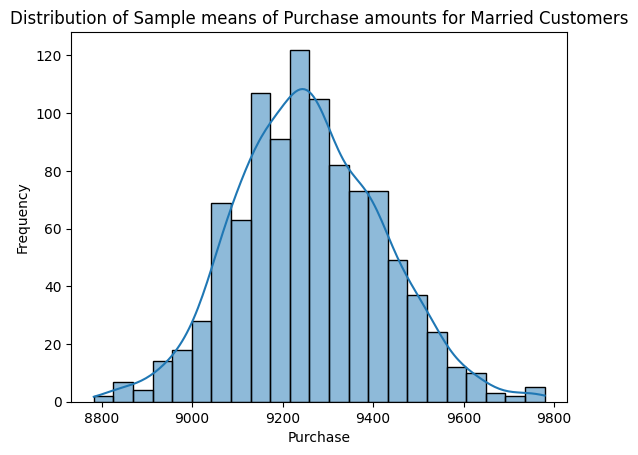

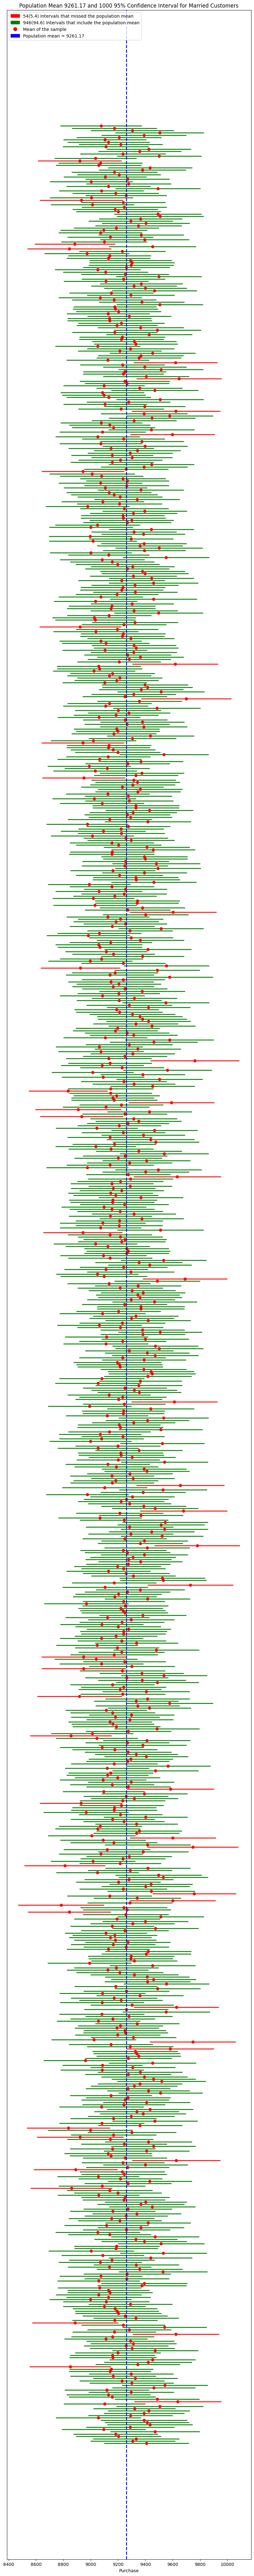

In [ ]:

married_sample_means = plotSampleMeanDistributionAndConfidenceIntervals(married.Purchase, 1000,PopMeanMarried , confidence=0.95, text="for Married Customers")


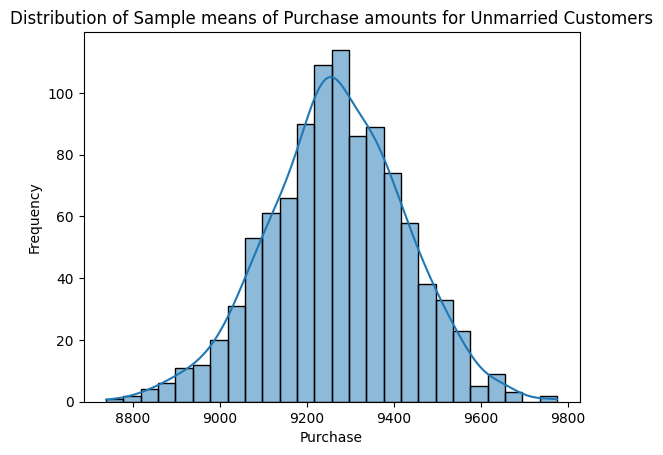

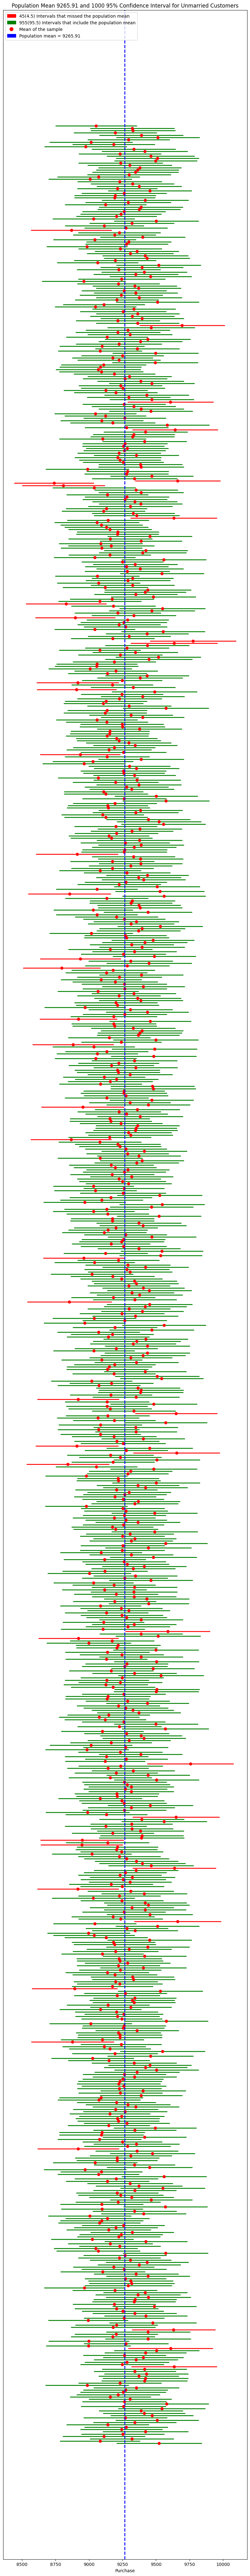

In [ ]:
unmarried_sample_means = plotSampleMeanDistributionAndConfidenceIntervals(unmarried.Purchase, 1000, PopMeanUnmarried, confidence=0.95, text="for Unmarried Customers")

array([[9523.693     , 9205.07047888, 9842.31552112],
       [9081.935     , 8781.95704204, 9381.91295796],
       [9319.937     , 9006.56987596, 9633.30412404],
       ...,
       [9328.598     , 9012.7350126 , 9644.4609874 ],
       [9323.287     , 9008.45058806, 9638.12341194],
       [9052.739     , 8748.10114   , 9357.37686   ]])

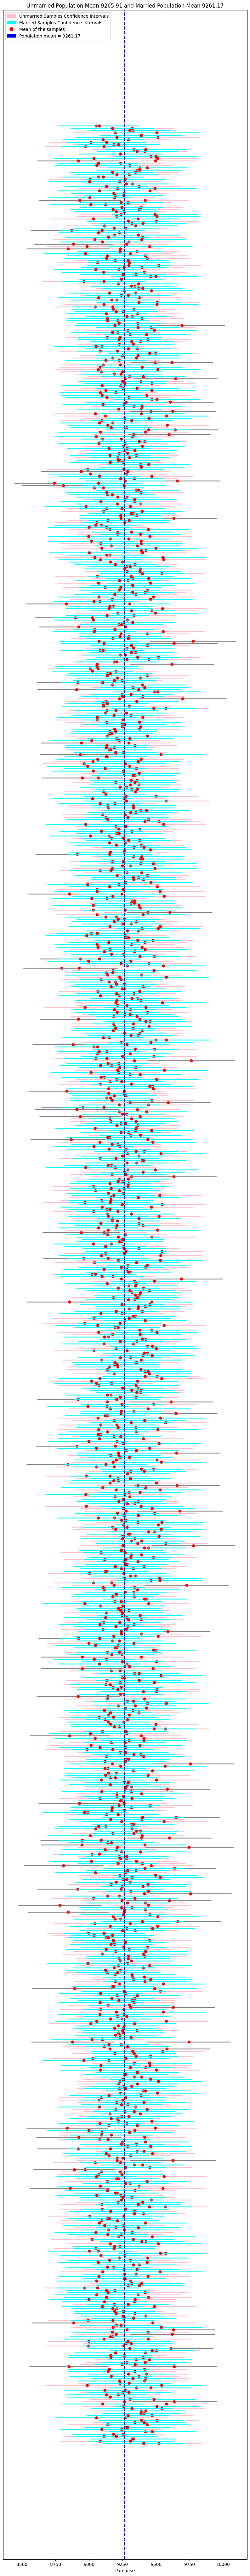

In [ ]:
#Plot the confidence intevals for married and unmarried on same graph

sample_means = unmarried_sample_means 
pop_mean = PopMeanUnmarried
totalIntervalCount = len(sample_means)
color='pink'

plt.figure(figsize=(10, 5+round(totalIntervalCount/10,0)))
missed=0

#Plot 1000 confidence intervals to see how many contain the population mean
for i in range(totalIntervalCount):
    # Plot the horizontal line for the confidence interval
    mean, lower,upper = sample_means[i]
    #Plot the confidence interval that miss the population mean in red
    if(lower<=pop_mean<=upper):
        plt.hlines(i*4, lower,upper, color=color, linewidth=2, label=f'95% CI for {mean:.2f}')
    else:
        missed=missed+1
        plt.hlines(i*4, lower,upper, color='gray', linewidth=2, label=f'95% CI for {mean:.2f}')
    # Plot the sample mean as a dot
    plt.plot(mean, i*4, 'ro', label='Mean')

# Plot the population mean
plt.axvline(pop_mean, color='b', linestyle='dashed', linewidth=2, label='Mean')
################################
sample_means =married_sample_means
pop_mean = PopMeanMarried
totalIntervalCount = len(sample_means)
color='cyan'

missed=0

#Plot 1000 confidence intervals to see how many contain the population mean
for i in range(totalIntervalCount):
    # Plot the horizontal line for the confidence interval
    mean, lower,upper = sample_means[i]
    #Plot the confidence interval that miss the population mean in red
    if(lower<=pop_mean<=upper):
        plt.hlines(i*4, lower,upper, color=color, linewidth=2, label=f'95% CI for {mean:.2f}')
    else:
        missed=missed+1
        plt.hlines(i*4, lower,upper, color='gray', linewidth=2, label=f'95% CI for {mean:.2f}')
    # Plot the sample mean as a dot
    plt.plot(mean, i*4, 'ro', label='Mean')

# Plot the population mean
plt.axvline(pop_mean, color='b', linestyle='dashed', linewidth=2, label='Mean')


# # Add custom legend
pink_line = mpatches.Patch(color='pink', label=f'Unmarried Samples Confidence Intervals')
cyan_line = mpatches.Patch(color='cyan', label=f'Married Samples Confidence Intervals')
blue_line = mpatches.Patch(color='blue', label=f'Population mean = {pop_mean:.2f}')
red_dot = plt.Line2D([0], [0], marker='o', color='w', label='Mean of the samples', markerfacecolor='red', markersize=10)

plt.legend(handles=[pink_line, cyan_line, red_dot,blue_line], loc='upper left')


plt.title(f'Unmarried Population Mean {PopMeanUnmarried:.2f} and Married Population Mean {PopMeanMarried:.2f}' )
plt.xlabel("Purchase")
plt.yticks([])  # Remove y-axis ticks
plt.show()

<li> Its quite clear there is overlap betweeen the spending habits of married and unmarried group. Further Statistical tests can be used to confirm the same.
<li> Walmart's marketing strategy can be agnostic of Marital Status

In [ ]:
from scipy.stats import ttest_ind

x1 = married.Purchase.sample(10000)
x2 = unmarried.Purchase.sample(10000)


t_score,p_value=ttest_ind(x1,x2 ,alternative = 'two-sided')
print(f'Two sample Ttest tscore:{t_score}   pvalue:{p_value}')

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between married and unmarried users' spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between married and unmarried users' spending.")

Two sample Ttest tscore:0.4968725813050076   pvalue:0.6192843698457708
Fail to reject the null hypothesis: There is no significant difference between married and unmarried users' spending.


## 4.5
<span style="font-size:30px; font-family:Arial;color:orange">Are confidence intervals of spending habits of different Age Groups overlapping?</span>


In [ ]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
import scipy.stats
import pingouin as pg

ages=[0,1,2,3,4]
ages[0]= df[df.Age=='0-17'].Purchase
ages[1]= df[df.Age=='18-25'].Purchase
ages[2]= df[df.Age=='26-35'].Purchase
ages[3]= df[df.Age=='36-45'].Purchase
ages[4]= df[(df.Age=='46-50') | (df.Age=='51-55') | (df.Age=='55+')].Purchase



normal=True
for agegroup in ages:
    test_stat, p_value = stats.shapiro(agegroup)
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis: Not a normal distribution")
        normal=False
        break   
    else:
        print("Fail to reject the null hypothesis: We have normally distributed data.")

if(normal==True):
    #do test for homoscedasticity, not doing now due to time constraint.
    f_stats_agegroup, p_value = stats.f_oneway(ages[0],ages[1],ages[2],ages[3],ages[4])

    # Conclusion
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("RANOVA test: Reject the null hypothesis: There is a significant difference between some age groups spending behaviour.")
    else:
        print("ANOVA test: Fail to reject the null hypothesis: There is no significant difference between users's spending based on age group.")

else:
    #for non normal or heteroscadastic data, use Kruskal-Wallis test:
    f_stats_agegroup, p_value = stats.kruskal(ages[0],ages[1],ages[2],ages[3],ages[4])
    # Conclusion
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Kruskal test: Reject the null hypothesis: There is a significant difference between some age groups spending behaviour.")
    else:
        print("Kruskal test: Fail to reject the null hypothesis: There is no significant difference between users's spending based on age group.")


Reject the null hypothesis: Not a normal distribution
Kruskal test: Reject the null hypothesis: There is a significant difference between some age groups spending behaviour.


C:\tools\Manim\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15102.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import itertools


#All Possible Combinations of Length 2
combinations_length_2 = list(itertools.combinations(ages, 2))
print("\nAll Possible Combinations of Length 2:")

for comb in combinations_length_2:
    f_stats_agegroup, p_value = stats.kruskal(comb[0],comb[1])
    print(p_value)



# f_stats_agegroup, p_value = stats.kruskal(ages[0],ages[1])
# print(p_value)


All Possible Combinations of Length 2:
1.204438423326268e-07
6.889324374210475e-14
6.0567772452619345e-21
2.5349275769577004e-26
6.189498204566029e-06
4.380859216802348e-17
1.2191804877582344e-28
6.77906153008903e-08
1.691527139414775e-18
0.003180502873455703


<li> The spending habits of different age groups is statistically different.

# 5.0
<span style="font-size:50px; font-family:Arial;color:red">Business Insights


<li>We have data of 5891 customers
<li>Each user has shopped multiple times, from a minimum of 6 to a maximum of 1026 times
<li>On average, each user has shopped for 93 times.
<li>53% of users are from City C, 29% from City B
<li>35% of users have stayed in same city for 1-2 yrs
<li>58% of users are unmarried
<li>Average spend per user is 9568, with maximum spend at 18577 and minimum at 2318
<li>There are 3631 products
<li>Average product price is $7874, with maximum at $21257 and minimum at $37
<li>There are 264 products bought exclusively by males
<li>There are 43 products bought exclusively by females
<li>Occupations 0,4 and 7 have the maximum number of users, each have 11-12% users
<li>There are 117 products bought exclusively by Unmarried customers
<li>There are 107 products bought exclusively by Married customers
<li>Category 1, the highest grossing category, contains ALL the Top 1% revenue-grossing products for Walmart
<li>Category 19 contains some of the lowest priced items
<li>Out of these 4225(72%) are males, 1666 (28%) are females
<li>The ratio of men and women in customers is very skewed towards one gender with males shopping 3 times as frequently as females
<li>In the 0-17 age group, while only 3.7% of users lie, 35% of them are females, which is highest female ratio in any age group.
<li>The gender wise breakup for occupation is similar to overall gender breakup. One Way ANOVA on Occupation and Male Percentage column can be used to confirm this further
<li>Occupation 9 is a occupation where 96.5% of users are males
<li>Occupation 18 is a occupation where 94% of users are females
<li>The gender distribution across the three cities is same.
<li>The duration of stay is similar for both genders across various duration categories.
<li>Ratio of unmarried users is same across genders, 58.5% of males are unmarried, 56.8% of females are unmarried
<li>For highest grossing category, category 1, 82% buyers are male.  However, as overall we have 75% male customers for Walmart, it would be prudent to check if the 82% is statistically significantly different from the average.
<li>Using actual population of 414259 rows, Population Mean purchase amount for males is $9437.53
<li>Using actual population of 135809 rows,Population Mean purchase amount for females is $8734.57
<li>75% of purchases are by males and 25% are by females
<li>Out of top 50 customers in terms of number of purchases, only 8 are females
<li>Out of top 50 customers in terms of amount of purchases, only 6 are females
<li>There is statistically significant difference between spending amount for the two genders (P-value: 2.187004447580818e-22)
<li>The highest number of users are in 26-35 age category and comprise 34% of overall users
<li>19% users are in 36-45 age group and 18% of users belong to 18-25 age group
<li>For 26-35 age group, 36% of users are from occupations 0,4,7
<li>For 18-25 age group, 32% of users are from occupations 0,4,12
<li>For 36-45 age group, 23% of users are from occupations 0,7,17
<li>In City A, 44% of users are from 26-35 age group
<li>While 53% of users are from City C, it has 71% of all 55+ aged users  
<li>72% of users in 18-25 age group are unmarried
<li>53% of users in 26-35 age group are unmarried
<li>52% of users in 36-45 age group are unmarried
<li>The spending habits of different age groups is statistically different.
<li>There are 20 unique occupations captured in the data
<li>35-40% users in each city are from occupations 0,4 and 7
<li>66% of users in Occupation 4 are unmarried
<li>50% of users in Occupation 0 are unmarried
<li>45% of users in Occupation 7 are unmarried
<li>75% of users in Occupation 19 are unmarried
<li>There are three cities in consideration
<li>The duration of stay in the city is similar in all three cities across various duration categories.
<li>While overall we have 58% unmarried users, in City C we have only 48% of unmarried users
<li>Every product category is present in every city
<li>42% of purchases are from City B, 31% from city C
<li>Data is collected for users from 0 to 4+ yrs of stay in a city
<li>The breakup of married-unmarried users is same as the general breakup of duration of stay of users irrespective of marital status.  So marital status does not have any impact on duration of stay in a city for a user
<li>There is overlap betweeen the spending habits of married and unmarried users (pvalue:0.6192843698457708)
<li>Walmart's marketing strategy can be agnostic of Marital Status
<li>There are 20 product categories
<li>Product Category 1 is the highest grossing category with USD 1.91 Billion in revenue
<li>Categories 5,8,6,2,3,16,11,10 are the other 1 Billion plus categories
<li>Category 19 is the lowest grossing category with just $59378 revenue
<li>Using actual population of 414259 rows, Population Mean purchase amount is $9263.9
<li>50% of customers shop between $5823 and $12054
<li>Overall range of purchase amount is from $23 to $23961


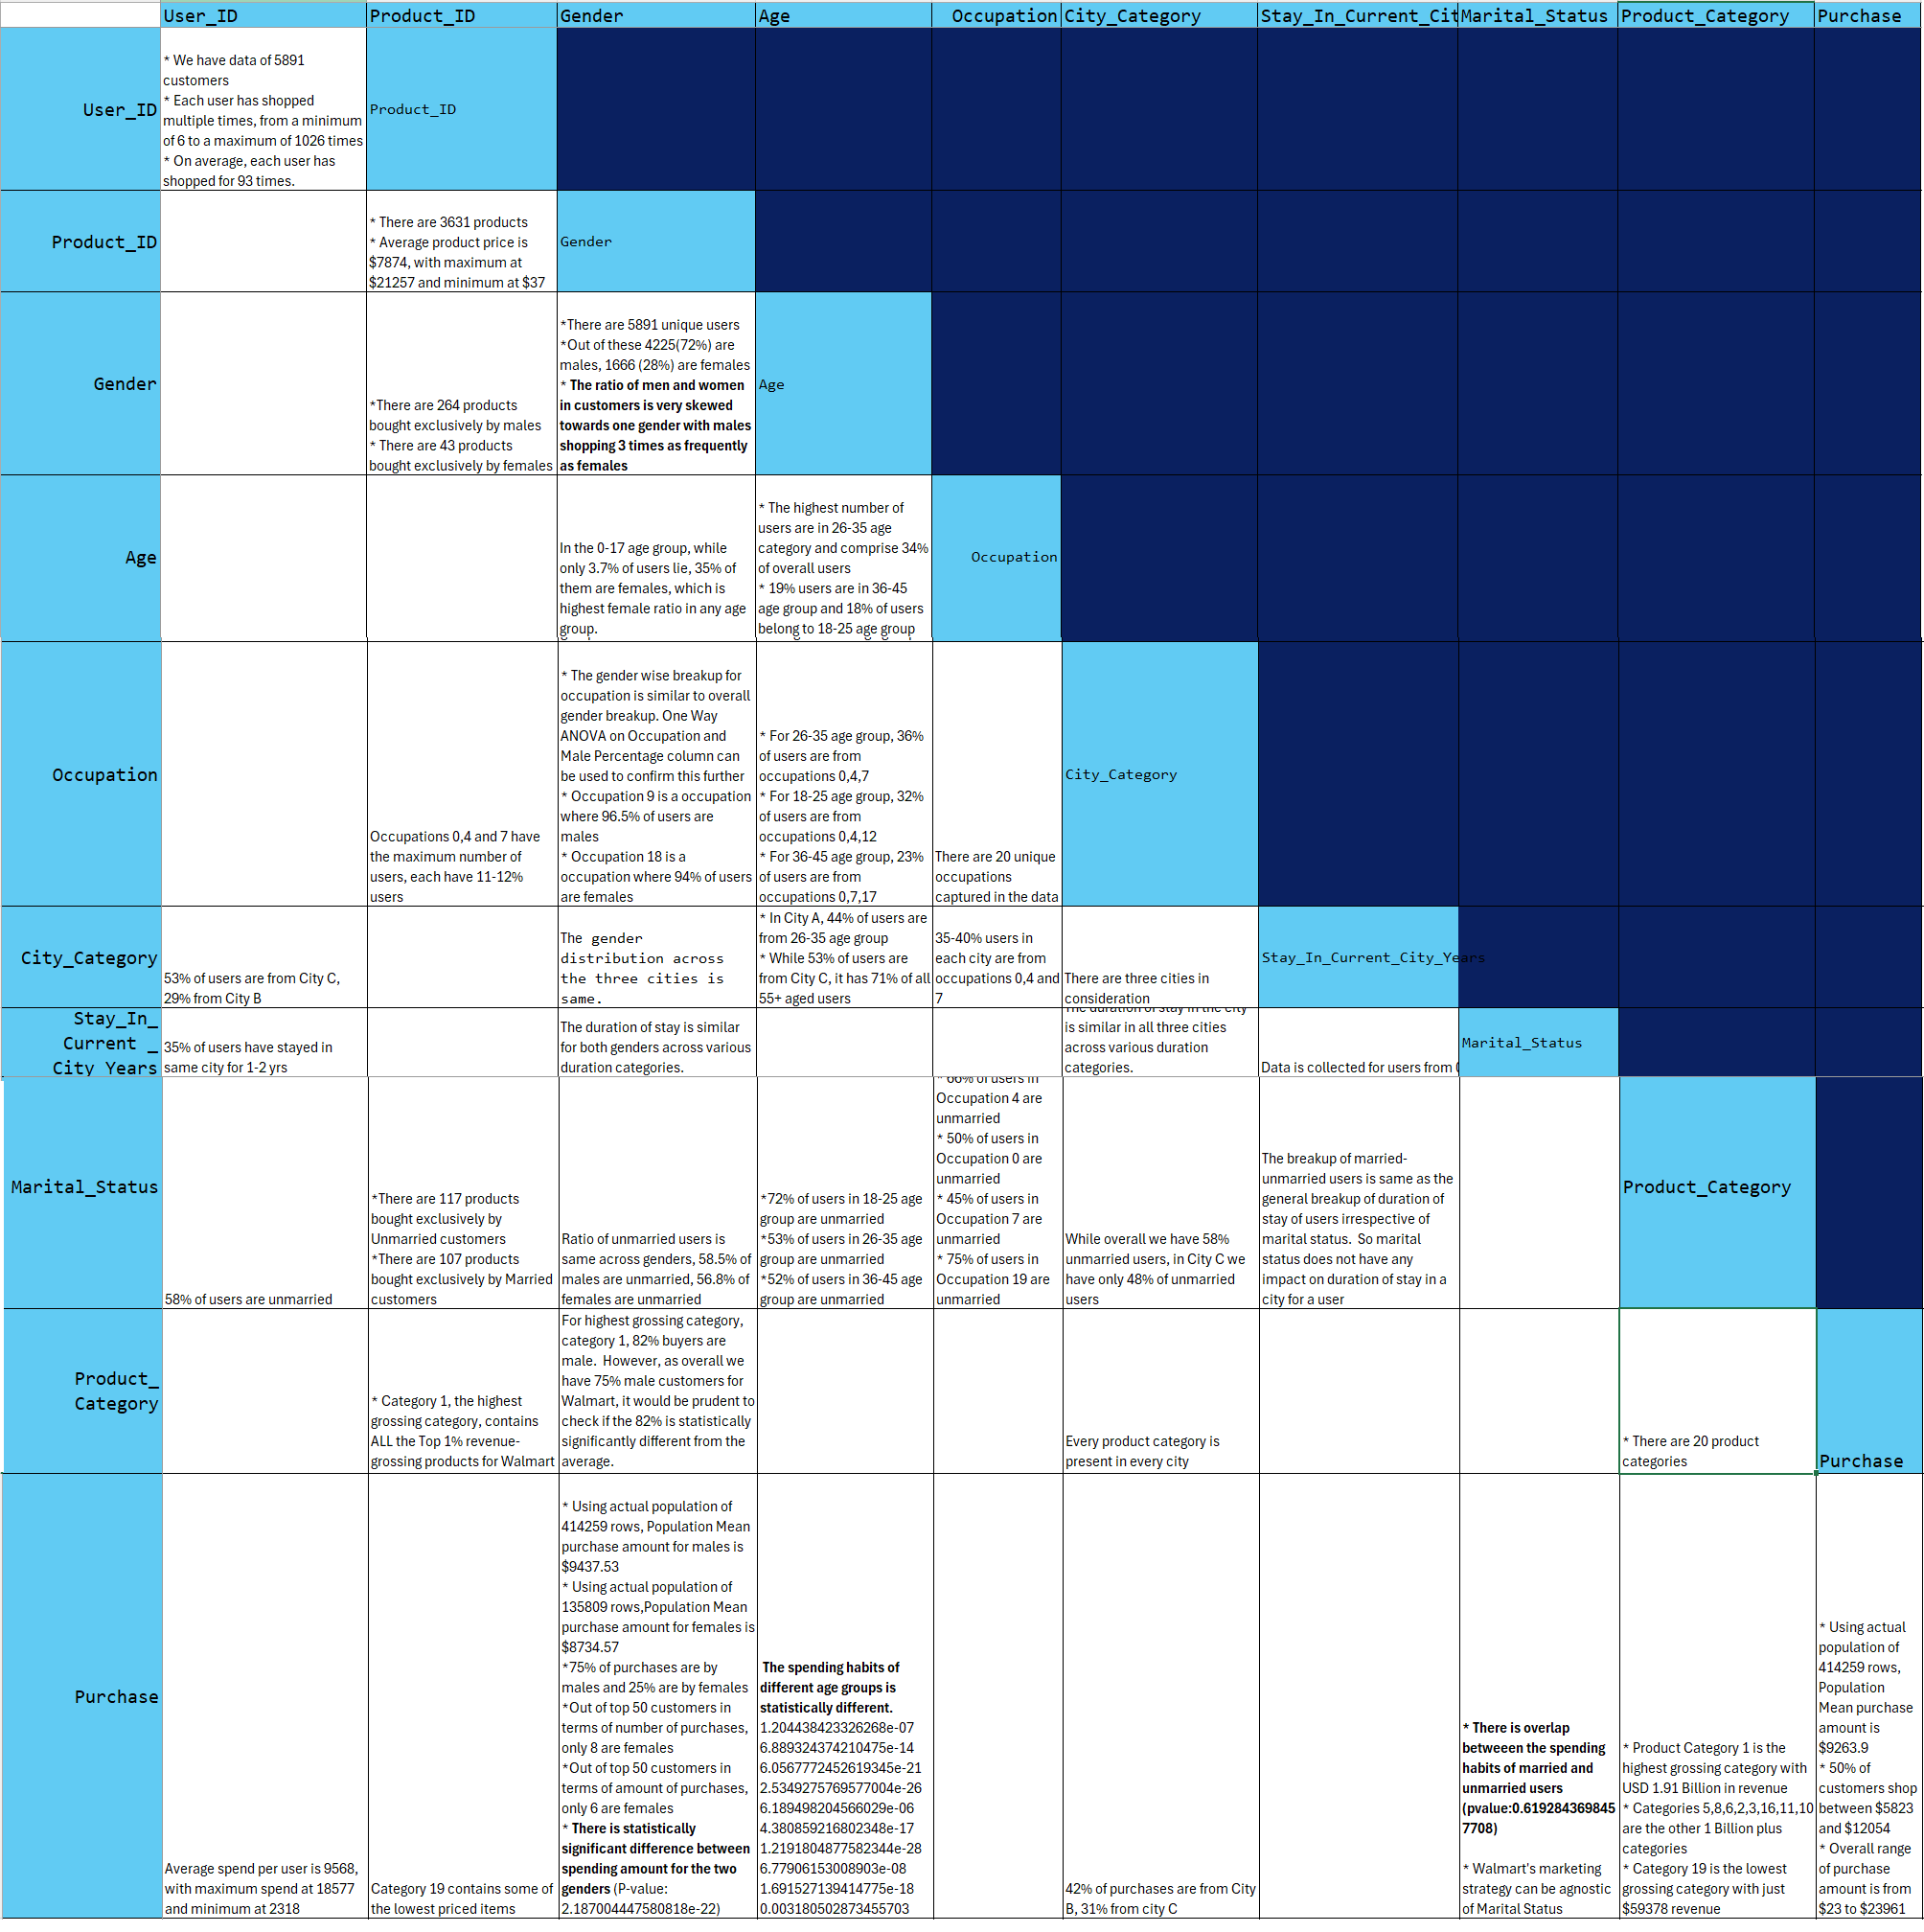

# 6.0
<span style="font-size:50px; font-family:Arial;color:red">Recommendations

# Conclusions 1

There is statistically significant difference between spending behaviour of the two genders. In simpler words, spending behaviors of the two genders is different, with a high level of confidence.

## Recommended Actions

### Targeted Marketing Campaigns
- Walmart can tailor marketing messages and promotions to cater specifically to the unique spending behaviors of each gender. For example, separate campaigns can be created to highlight products or services that are more appealing to each group.

### Product Selection
- Understanding the distinct spending patterns can help Walmart curate their product offerings to better meet the preferences of male and female customers.

### Merchandising and Layout: 
- Store layouts and merchandising strategies can be adjusted to cater to the different spending habits. For instance, products that are more popular with one gender can be strategically placed in areas where that demographic is more likely to shop.




# Conclusions 2

There is statistically significant difference between spending behaviour of the various age groups

## Recommended Actions

### Targeted Marketing Campaigns
- Develop targeted marketing campaigns for different age groups, focusing on products and offers that appeal to each group.
- Use social media and digital marketing to reach younger customers, while traditional advertising methods can be employed for older customers.

### Personalized Promotions:

- Implement personalized promotions and discounts based on the purchasing history and preferences of different age groups.
- Offer loyalty programs tailored to various age groups to encourage repeat purchases.

### Product Assortment:
- Adjust the product assortment to cater to the preferences of different age groups. For example, increase the stock of trendy fashion items for younger customers and premium quality products for older customers.
- Introduce exclusive products or brands that resonate with specific age groups.

### In-Store Experience:
- Enhance the in-store experience by creating age-specific sections or displays. For example, a tech corner for younger customers and a wellness section for older customers.
- Provide excellent customer service tailored to the needs of different age groups. Train staff to address the concerns and preferences of each age group effectively.

### Online Shopping Experience:
- Optimize the online shopping experience by offering user-friendly interfaces and personalized recommendations for different age groups.
- Ensure mobile compatibility and ease of use for younger customers who are more likely to shop via smartphones.

### Events and Workshops:
- Organize in-store events and workshops that cater to the interests of different age groups. For example, DIY workshops for younger customers and health and wellness seminars for older customers.



# Conclusions 3
Less women are visiting Walmart
We observe that only 25% of customers are women as per given data.

## Possible reasons
- Walmart's marketing strategies might be more appealing to men, leading to higher male foot traffic and spending
- Cultural norms and societal expectations might influence shopping behaviors. For example, women might be more likely to shop for groceries and household items, while men might shop for higher-ticket items
- Gender Roles: Traditional gender roles might play a part in determining who does the shopping and what they buy.

## It could indicate that shopping experience of women needs improvement 
This can be done by 
- keeping more items relevant to women. The product mix at Walmart might cater more to male preferences, such as electronics and automotive products, which could result in higher spending by men
- making it easier to reach 
- helpful and women friendly staff
- ensuring women safety
- Women are more likely to use coupons and look for discounts, which might lead them to shop at stores that offer better deals